# Supervised Learning Foundation (Classification)

17 - Logistic regression and confusion matrix

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r"Social_Network_Ads.csv")
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.drop('User ID', axis=1, inplace=True)

In [8]:
df.sample(5)

Gender  Age  EstimatedSalary  Purchased
3    Female   27            57000          0
70     Male   25            80000          0
127    Male   26            32000          0
254  Female   50            44000          0
238  Female   46            82000          0

In [9]:
df['Purchased'].value_counts(normalize= True)

Purchased
0    0.6425
1    0.3575
Name: proportion, dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df['Gender']= LabelEncoder().fit_transform(df['Gender'])

In [12]:
df.head()

Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

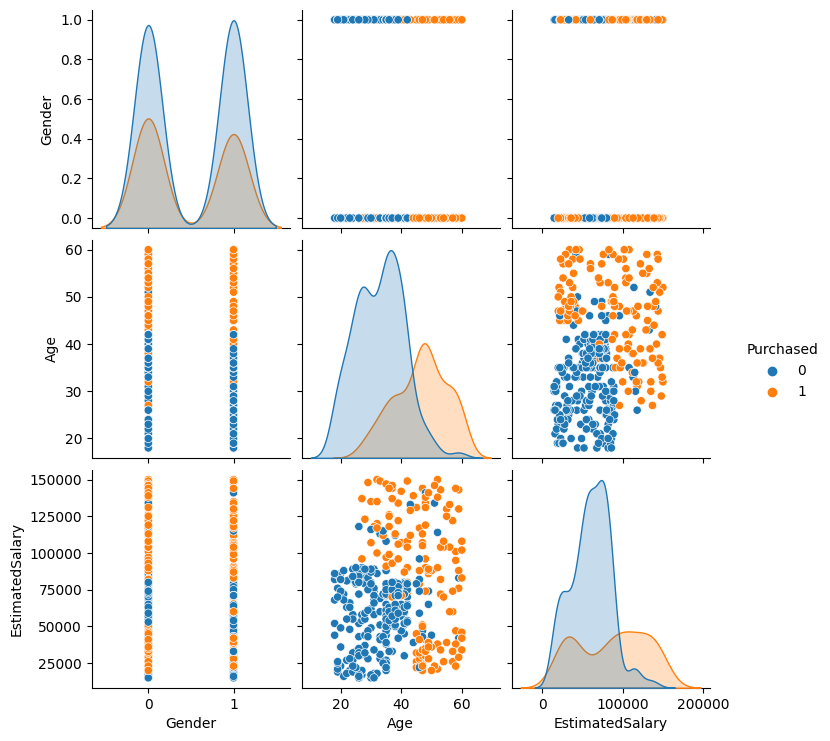

In [13]:
sns.pairplot(df, hue='Purchased')

we see that `Purchased` is effective by `age` and `EstimatedSalary`.

In [14]:
x= df.drop('Purchased', axis=1)
y= df['Purchased']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.1)

In [17]:
# x_train, x_val, y_train, y_val= train_test_split(x_train,y_train, test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [19]:
lr= LogisticRegression().fit(x_train, y_train)
lr

LogisticRegression()

In [36]:
train_preds= lr.predict(x_train)
test_preds= lr.predict(x_test)

acc_train= r2_score(y_train, train_preds)
acc_test= r2_score(y_test, test_preds)

print(f"Acc training= {acc_train} acc test= {acc_test}")

Acc training= -1.5239134082899817 acc test= -2.4909090909090907


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
len(test_preds)

80

In [38]:
y_test

255    1
319    0
102    0
293    0
88     0
      ..
205    0
207    0
301    1
77     0
326    0
Name: Purchased, Length: 80, dtype: int64

In [39]:
test_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

bad accuracy

i thank we should make `scale` for dataset

In [41]:
from sklearn.preprocessing import StandardScaler
x_scl = StandardScaler().fit_transform(x)
x_scl

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x_scl,y, test_size=0.2)

In [43]:
lr2= LogisticRegression().fit(x_train, y_train)
lr2

LogisticRegression()

In [44]:
train_preds2= lr2.predict(x_train)
test_preds2= lr2.predict(x_test)

acc_train2= r2_score(y_train, train_preds2)
acc_test2= r2_score(y_test, test_preds2)

print(f"Acc training= {acc_train2} acc test= {acc_test2}")

Acc training= 0.33488865323435846 acc test= 0.5054945054945056


In [45]:
test_preds2

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [46]:
len(y_test)
len(test_preds)
len(test_preds2)

80

In [47]:
df_2col= pd.DataFrame({'y': y_test,'test1': test_preds, 'test2': test_preds2})
df_2col.head(10)

y  test1  test2
257  0      0      0
114  0      1      1
141  0      0      0
132  0      0      0
232  1      0      1
367  1      0      1
197  0      0      0
194  0      1      0
347  1      0      1
73   0      1      0

!["17-confussion_matrix"](17-confussion_matrix.png)

we prefer model with less `FN` more than less `FP`.

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
cm = confusion_matrix(y_test, test_preds)
cm

array([[55,  0],
       [25,  0]], dtype=int64)

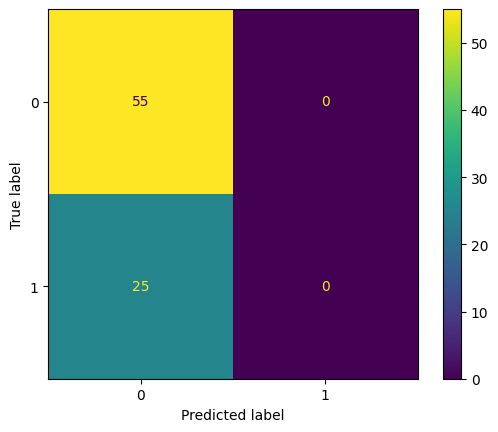

In [29]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [30]:
cm2 = confusion_matrix(y_test, test_preds2)
cm2

array([[51,  4],
       [ 9, 16]], dtype=int64)

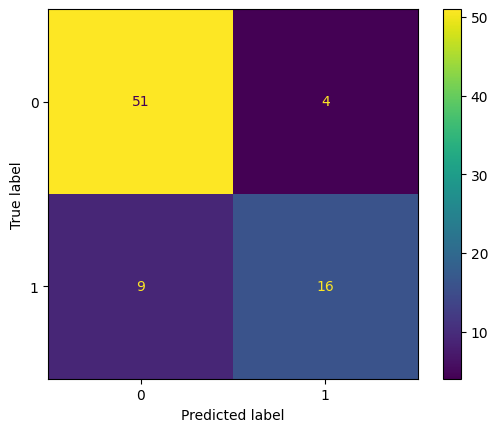

In [31]:
cmd2= ConfusionMatrixDisplay(cm2)
cmd2.plot()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
accuracy_score(y_train, train_preds2)

0.840625

In [34]:
accuracy_score(y_test, test_preds2)

0.8375

In [35]:
precision_score(y_train, train_preds2)

0.8316831683168316

In [36]:
precision_score(y_test, test_preds2)

0.8

In [37]:
recall_score(y_train, train_preds2)

0.711864406779661

In [38]:
recall_score(y_test, test_preds2)

0.64

18 - Building the visualization code

import pylab to visualize data which includes class 1 and class 2

In [39]:
import pylab as pl

take the most two features is effective for `Purchased` which are `Age` and `EstimatedSalary`.

determine min and max for each feature and subtract -1 for start point is zero

In [40]:
age_min, age_max= x_scl[:,1].min() -1, x_scl[:, 1].max() -1
print(age_min, age_max)

-2.877310557833164 1.1342408758474711


In [41]:
es_min, es_max= x_scl[:,2].min() -1, x_scl[:, 2].max() -1
print(es_min, es_max)

-2.6075056615492507 1.3567499772898386


plot grid with step 0.2 

In [42]:
age_grid, es_grid= np.meshgrid(np.arange(age_min, age_max, 0.02), np.arange(es_min, es_max, 0.02))
print(age_grid, es_grid)

[[-2.87731056 -2.85731056 -2.83731056 ...  1.08268944  1.10268944
   1.12268944]
 [-2.87731056 -2.85731056 -2.83731056 ...  1.08268944  1.10268944
   1.12268944]
 [-2.87731056 -2.85731056 -2.83731056 ...  1.08268944  1.10268944
   1.12268944]
 ...
 [-2.87731056 -2.85731056 -2.83731056 ...  1.08268944  1.10268944
   1.12268944]
 [-2.87731056 -2.85731056 -2.83731056 ...  1.08268944  1.10268944
   1.12268944]
 [-2.87731056 -2.85731056 -2.83731056 ...  1.08268944  1.10268944
   1.12268944]] [[-2.60750566 -2.60750566 -2.60750566 ... -2.60750566 -2.60750566
  -2.60750566]
 [-2.58750566 -2.58750566 -2.58750566 ... -2.58750566 -2.58750566
  -2.58750566]
 [-2.56750566 -2.56750566 -2.56750566 ... -2.56750566 -2.56750566
  -2.56750566]
 ...
 [ 1.31249434  1.31249434  1.31249434 ...  1.31249434  1.31249434
   1.31249434]
 [ 1.33249434  1.33249434  1.33249434 ...  1.33249434  1.33249434
   1.33249434]
 [ 1.35249434  1.35249434  1.35249434 ...  1.35249434  1.35249434
   1.35249434]]


Iter= 1
Train acc= 0.84375
Test acc= 0.8375
Iter= 2

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


Train acc= 0.85
Test acc= 0.825
Iter= 10
Train acc= 0.84375
Test acc= 0.8375
Iter= 50
Train acc= 0.84375
Test acc= 0.8375
Iter= 100
Train acc= 0.84375
Test acc= 0.8375
Iter= 500
Train acc= 0.84375
Test acc= 0.8375
Iter= 1000
Train acc= 0.84375
Test acc= 0.8375


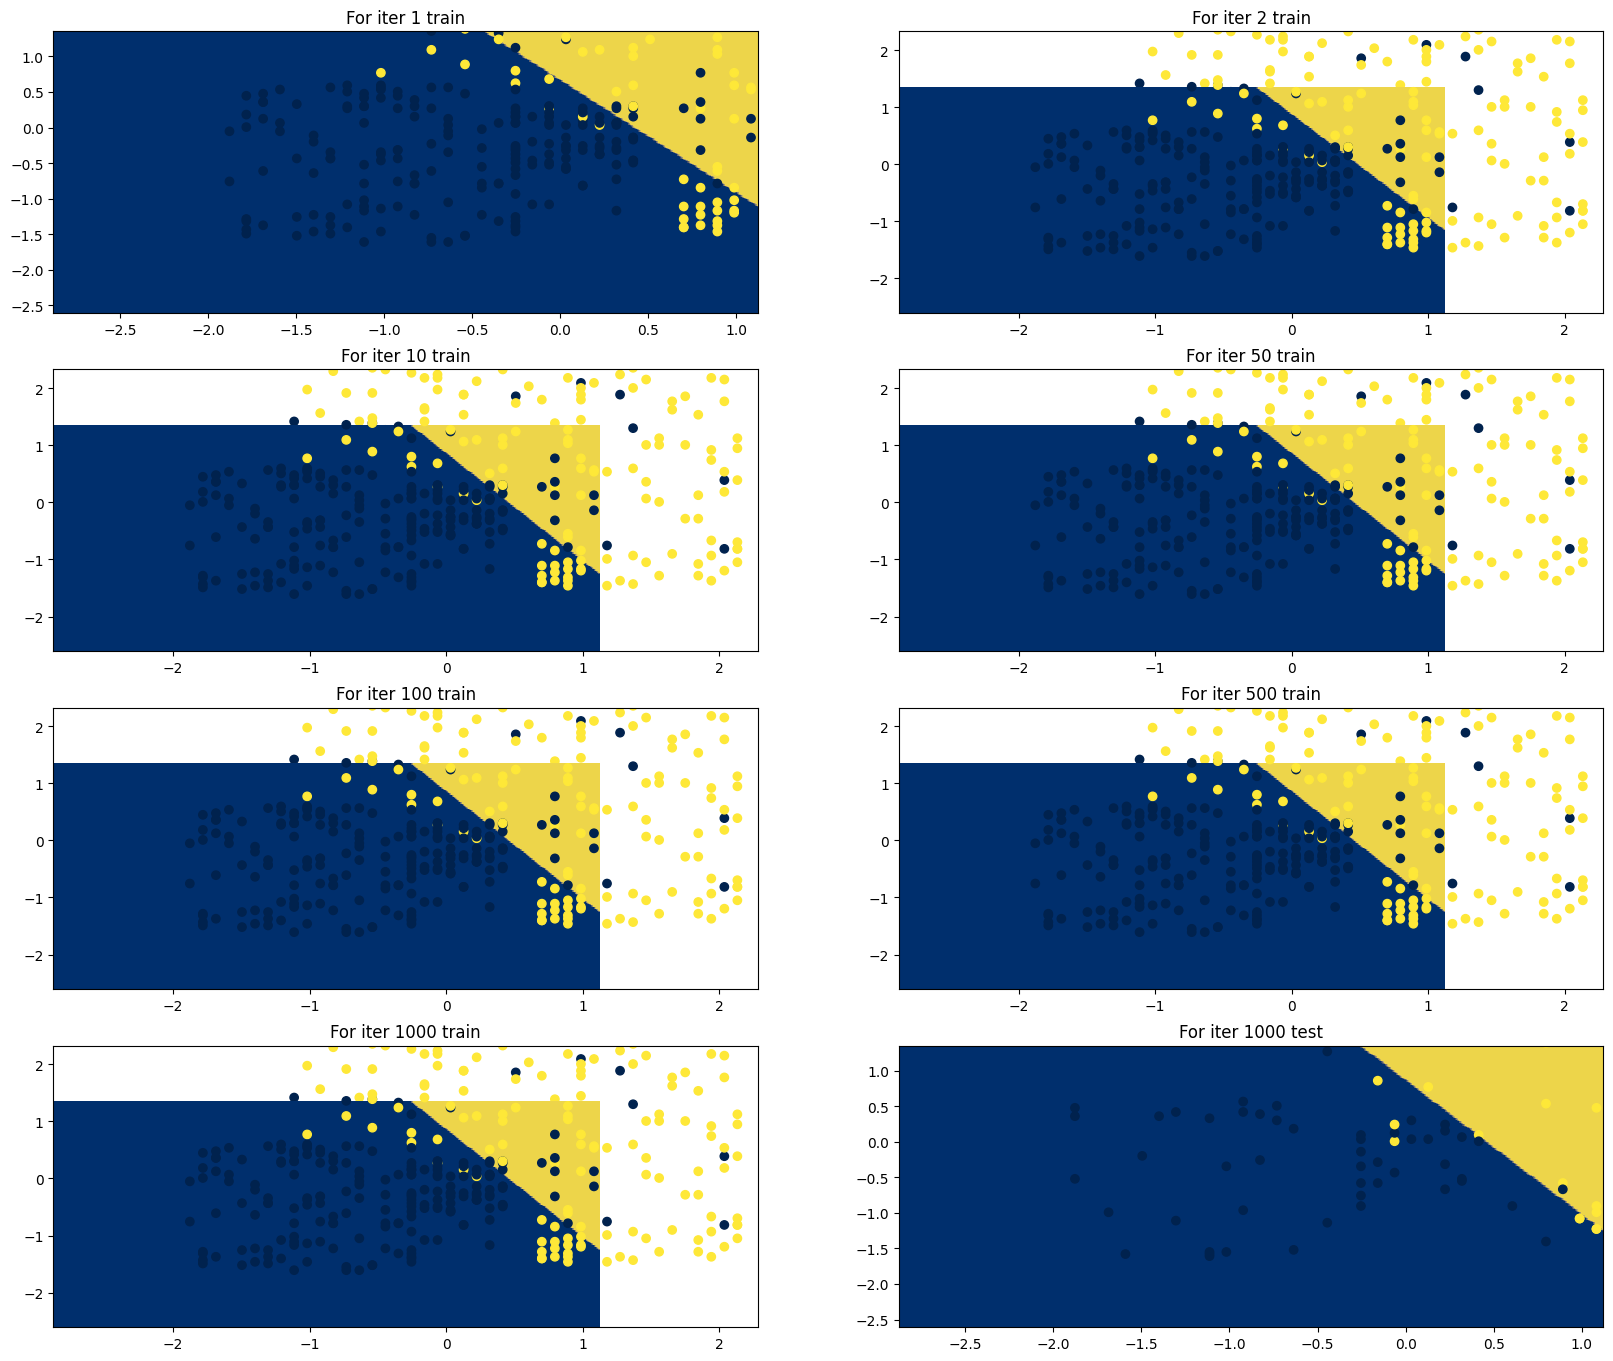

In [43]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for itr in [1, 2, 10, 50, 100, 500, 1000]:
    lr= LogisticRegression(max_iter=itr).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"Iter= {itr}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(7, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For iter {itr} train")
    
    plot += 1
    
    pl.subplot(7, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For iter {itr} test")
    
    plot +=1

pl.show()

19 - Support vector machine


!["19.1-SVC"](19.1-SVC.png)

support vector classifier (SVM)

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

default parameters

In [45]:
clf= SVC().fit(x_train, y_train)

train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)

print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.91875
Test acc= 0.8625


use `kernel parameter` with values `linear` for logistic regression, `poly` for polynomial regressionc and `rbf`.

In [46]:
for kr in ["linear", "poly", "rbf"]:
    clf= SVC(kernel=kr).fit(x_train, y_train)
    
    train_preds= clf.predict(x_train)
    test_preds= clf.predict(x_test)
    
    print(f"Kernel: {kr}")
    print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
    print(f"Test acc= {accuracy_score(y_test, test_preds)}")
    print('-'*40)

Kernel: linear
Train acc= 0.846875
Test acc= 0.825
----------------------------------------
Kernel: poly
Train acc= 0.86875
Test acc= 0.85
----------------------------------------
Kernel: rbf
Train acc= 0.91875
Test acc= 0.8625
----------------------------------------


we show that `rbf` make the `best accuracy`

use `polynomial` and some value of `degree`

In [47]:
for dg in [1, 2, 3, 4, 10, 20, 50]:
    clf= SVC(kernel='poly', degree=dg).fit(x_train, y_train)
    
    train_preds= clf.predict(x_train)
    test_preds= clf.predict(x_test)
    
    print(f"Degree: {dg}")
    print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
    print(f"Test acc= {accuracy_score(y_test, test_preds)}")
    print('-'*40)

Degree: 1
Train acc= 0.840625
Test acc= 0.825
----------------------------------------
Degree: 2
Train acc= 0.803125
Test acc= 0.7875
----------------------------------------
Degree: 3
Train acc= 0.86875
Test acc= 0.85
----------------------------------------
Degree: 4
Train acc= 0.821875
Test acc= 0.7875
----------------------------------------
Degree: 10
Train acc= 0.853125
Test acc= 0.75
----------------------------------------


Degree: 20
Train acc= 0.86875
Test acc= 0.7625
----------------------------------------
Degree: 50
Train acc= 0.871875
Test acc= 0.725
----------------------------------------


plot data with `degree = 3` and different kernels

Kernel= linear
Train acc= 0.846875
Test acc= 0.825
Kernel= poly
Train acc= 0.875
Test acc= 0.8375
Kernel= rbf
Train acc= 0.925
Test acc= 0.8625


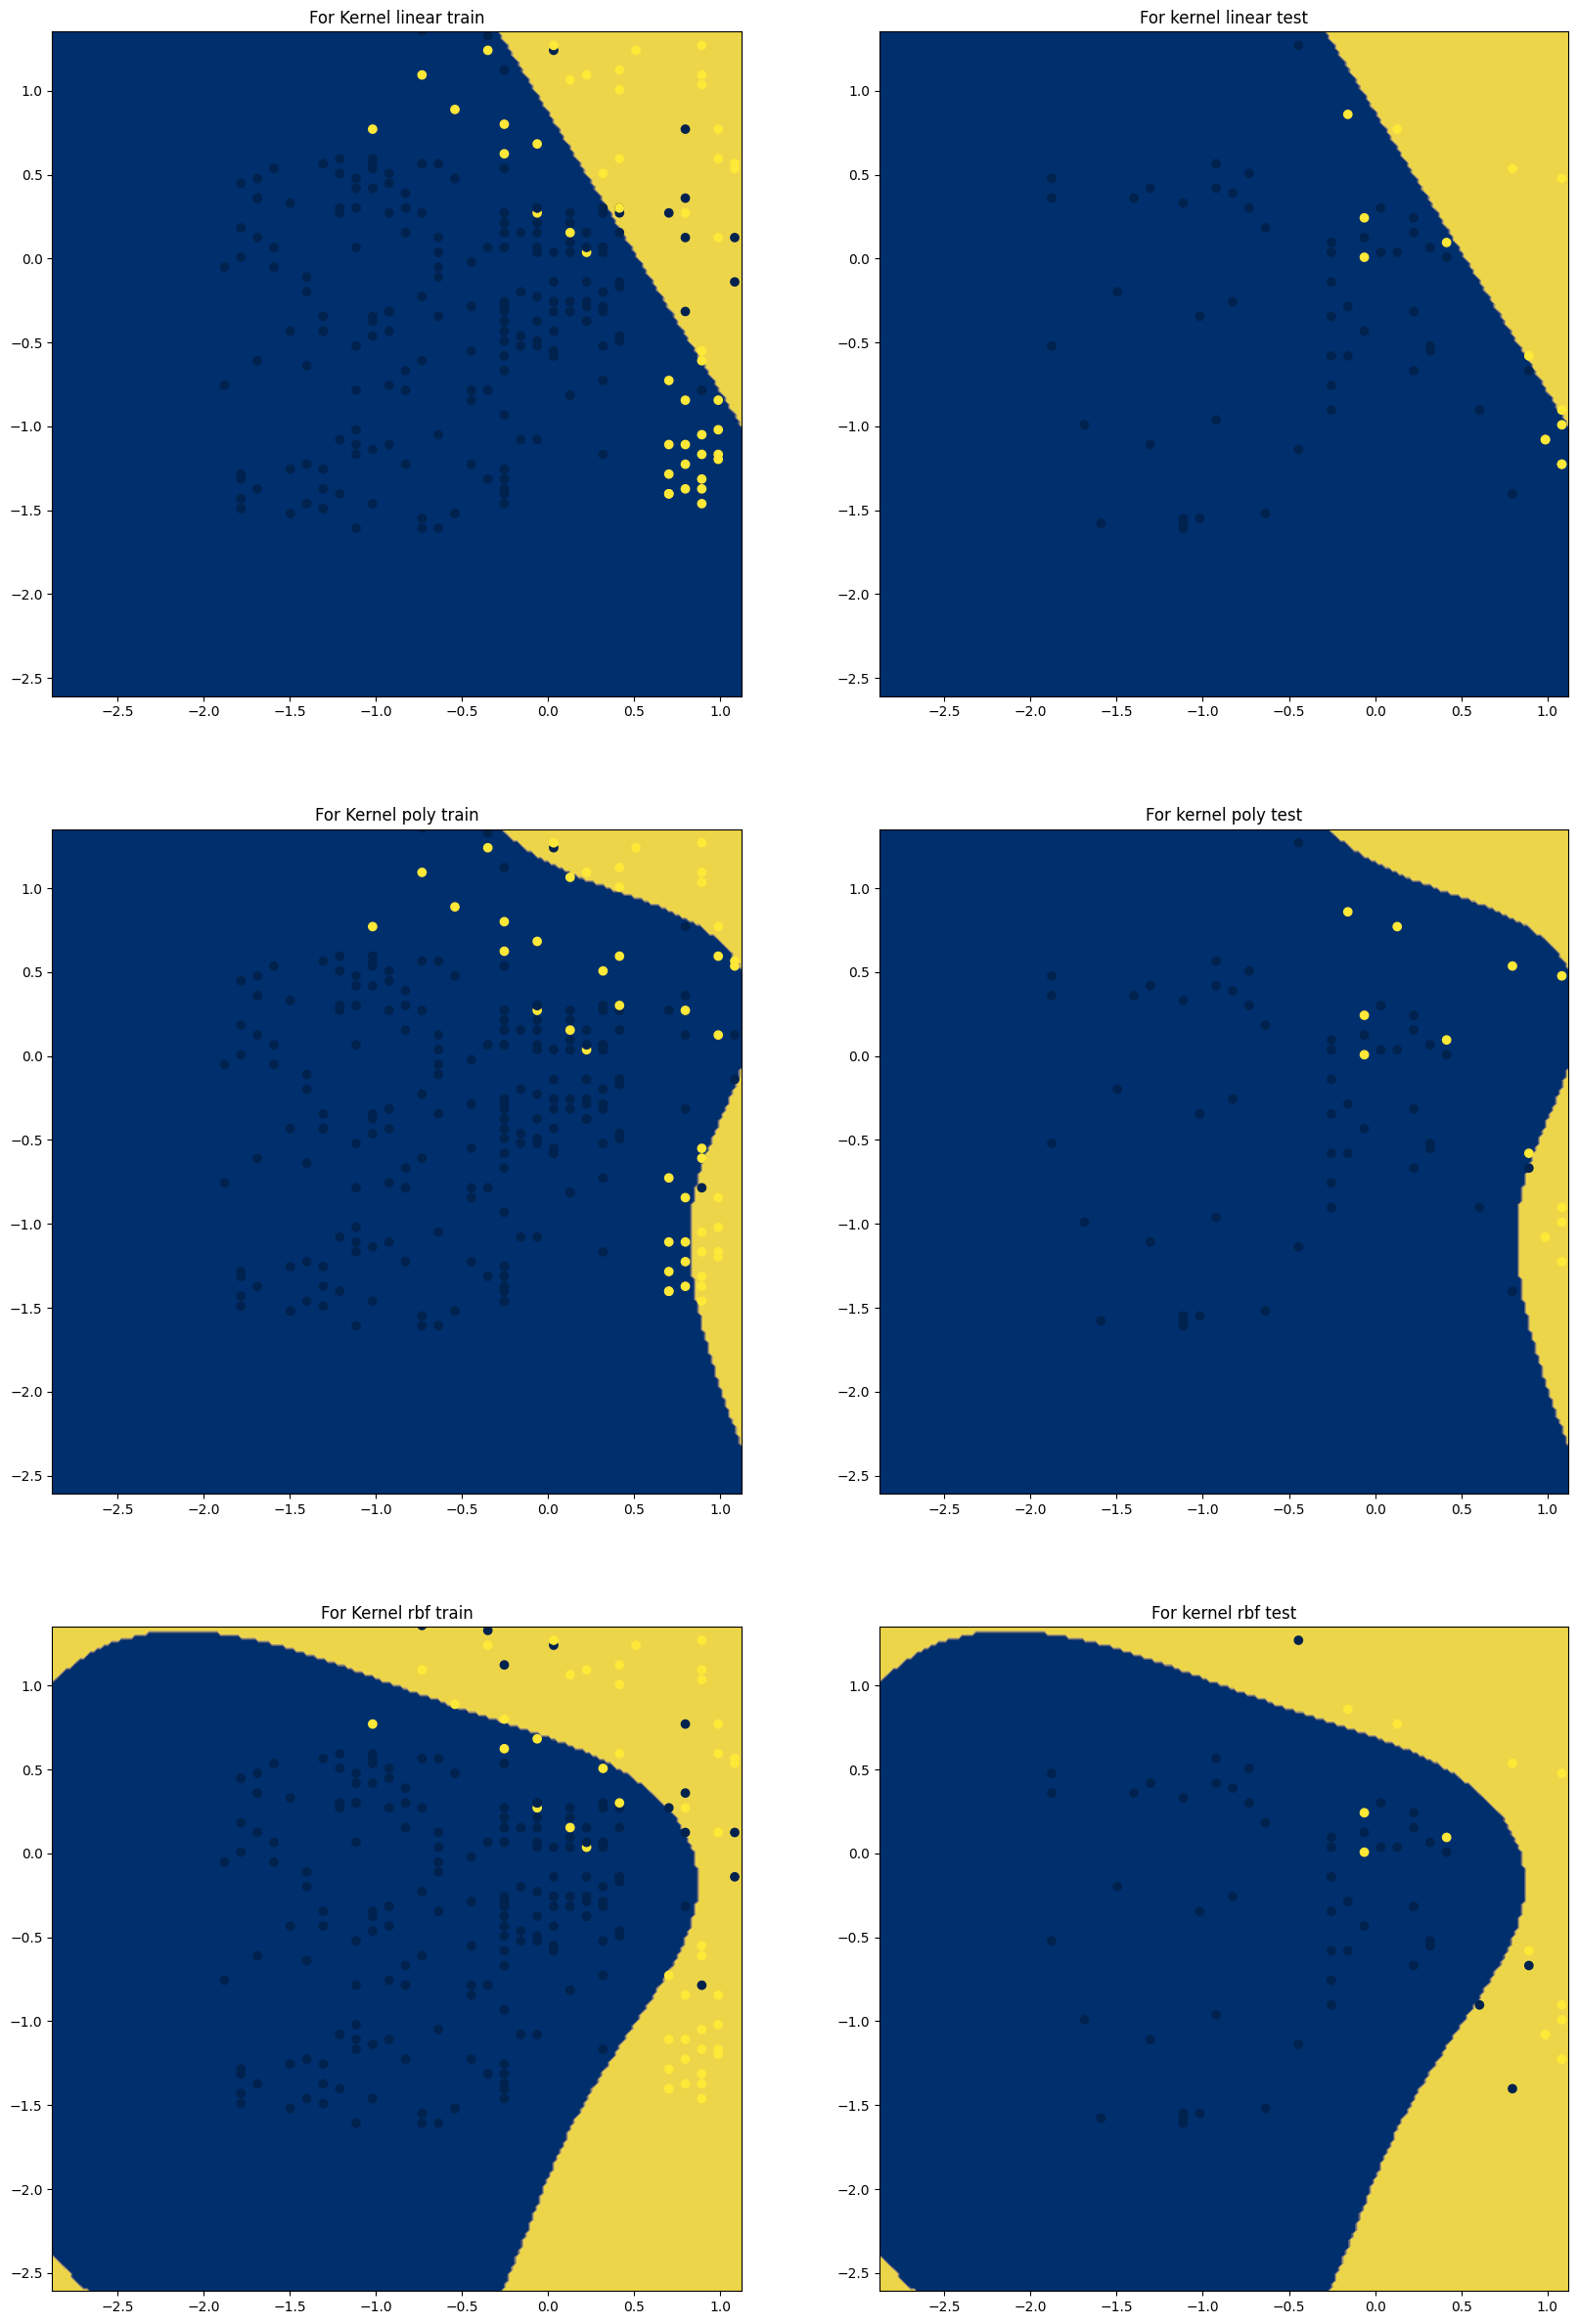

In [76]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for kr in ["linear", "poly", "rbf"]:
    lr= SVC(kernel=kr, degree=3).fit(x_train[:, 1:], y_train)
    
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    
    print(f"Kernel= {kr}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(3, 2, plot)
    
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For Kernel {kr} train")
    
    plot += 1
    
    pl.subplot(3, 2, plot)
    
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For kernel {kr} test")
    
    plot += 1

pl.show()

20 - K-nearest neighbor

!["20.1-KNN"](20.1-KNN.png)

KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

In [50]:
clf= KNeighborsClassifier().fit(x_train, y_train)

train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)

print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.928125
Test acc= 0.8625


In [52]:
for nb in range(1,10,2):
    clf= KNeighborsClassifier(n_neighbors= nb).fit(x_train, y_train)
    train_preds= clf.predict(x_train)
    test_preds= clf.predict(x_test)
    print(f"Number of neighbors: {nb}")
    print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
    print(f"Test acc= {accuracy_score(y_test, test_preds)}")
    print('-'*40)

Number of neighbors: 1
Train acc= 0.996875
Test acc= 0.8625
----------------------------------------
Number of neighbors: 3
Train acc= 0.946875
Test acc= 0.8625
----------------------------------------
Number of neighbors: 5
Train acc= 0.928125
Test acc= 0.8625
----------------------------------------
Number of neighbors: 7
Train acc= 0.925
Test acc= 0.875
----------------------------------------
Number of neighbors: 9
Train acc= 0.925
Test acc= 0.875
----------------------------------------


- when `Number of neighbors: 1` the model make `overfitting`
- when `Number of neighbors: 7` the model make `goodfitting`

plot data with `Number of neighbors`

Kernel= 1
Train acc= 0.99375
Test acc= 0.8375
Kernel= 3
Train acc= 0.940625
Test acc= 0.8375
Kernel= 5
Train acc= 0.9375
Test acc= 0.8375
Kernel= 7
Train acc= 0.93125
Test acc= 0.875
Kernel= 9
Train acc= 0.928125
Test acc= 0.8625


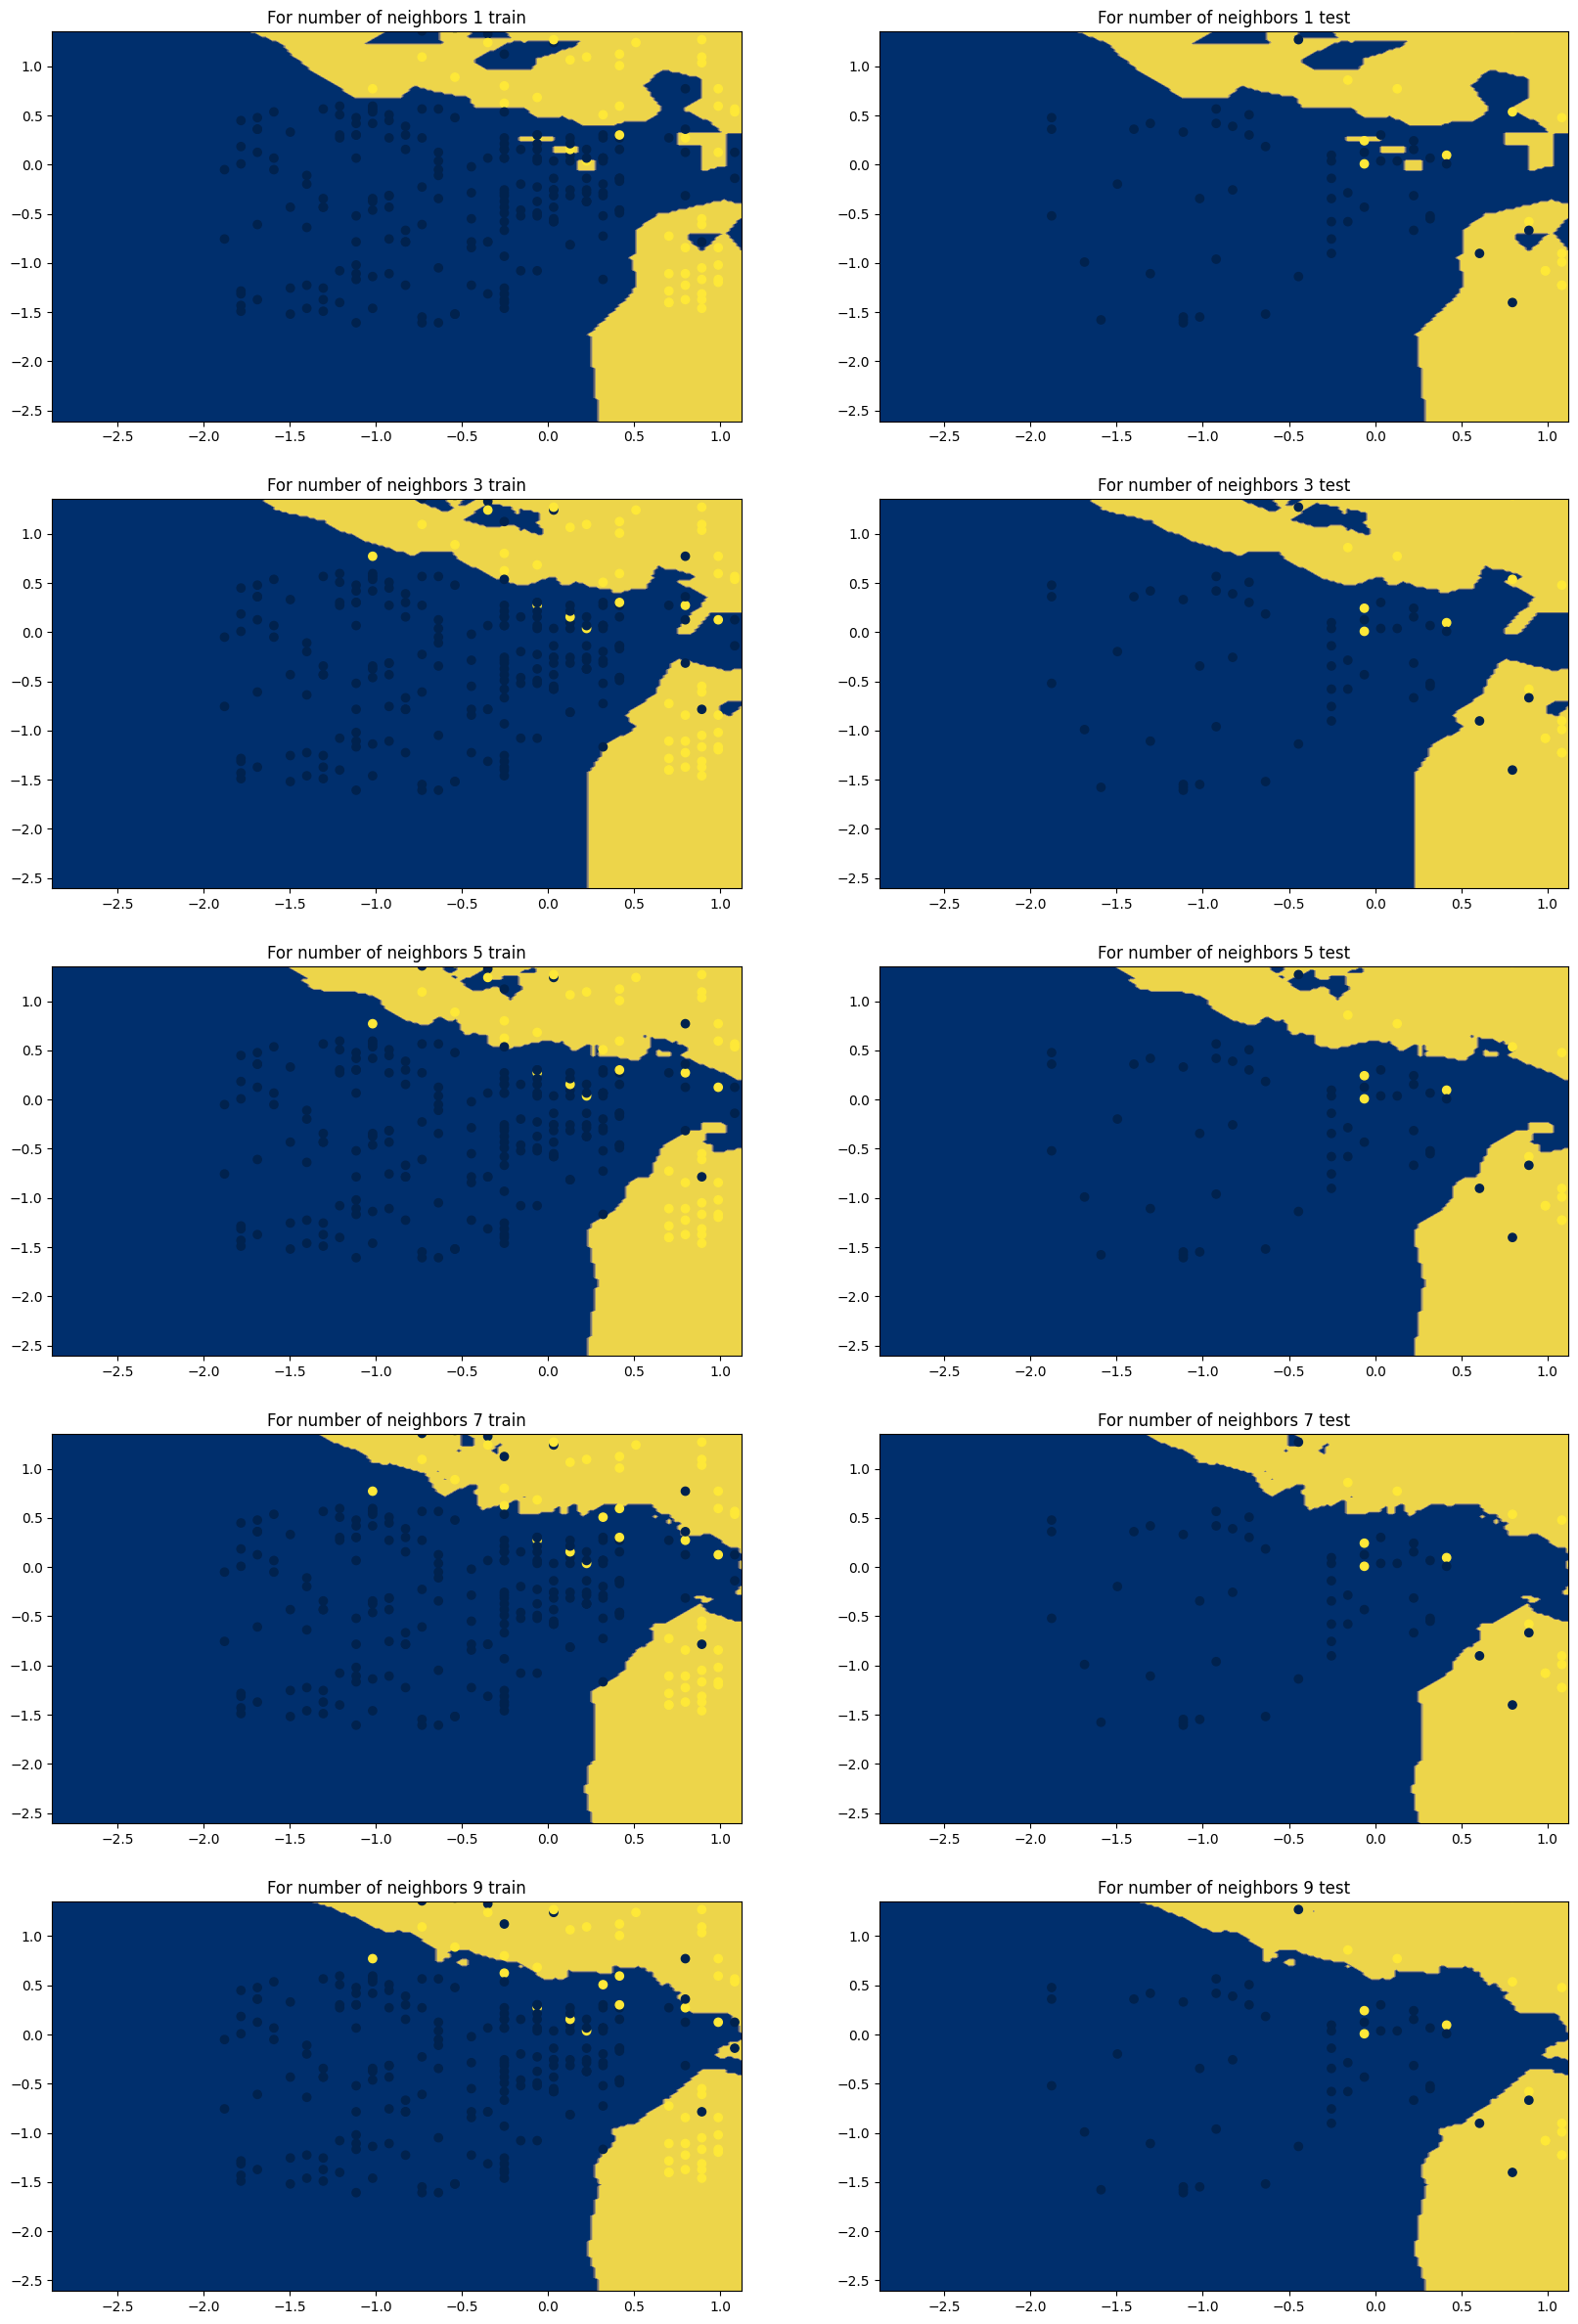

In [78]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for nb in range(1,10,2):
    lr= KNeighborsClassifier(n_neighbors=nb).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"Kernel= {nb}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(5, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For number of neighbors {nb} train")
    
    plot += 1

    pl.subplot(5, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For number of neighbors {nb} test")
    
    plot +=1

pl.show()

+ 21 - Decision tree
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    - max_depth prevent `overfitting`
    - class_weight make balance between classes

!["21.1-DT"](21.1-DT.png)

!["21.2-DT"](21.2-DT.png)

!["21.3-DT"](21.3-DT.png)

!["21.4-DT"](21.4-DT.png)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

default

In [57]:
clf= DecisionTreeClassifier().fit(x_train, y_train)

train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)

print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.996875
Test acc= 0.8625


this more depth on sample data

In [58]:
clf.get_depth()

10

model make `overfitting`

plot data with `max_depth`

max_depth= 1
Train acc= 0.84375
Test acc= 0.825
max_depth= 2
Train acc= 0.928125
Test acc= 0.8625
max_depth= 3
Train acc= 0.928125
Test acc= 0.8625
max_depth= 4
Train acc= 0.946875
Test acc= 0.875
max_depth= 5
Train acc= 0.95
Test acc= 0.875
max_depth= 6
Train acc= 0.9625
Test acc= 0.875
max_depth= 7
Train acc= 0.971875
Test acc= 0.875
max_depth= 8
Train acc= 0.978125
Test acc= 0.8625
max_depth= 9
Train acc= 0.984375
Test acc= 0.8625


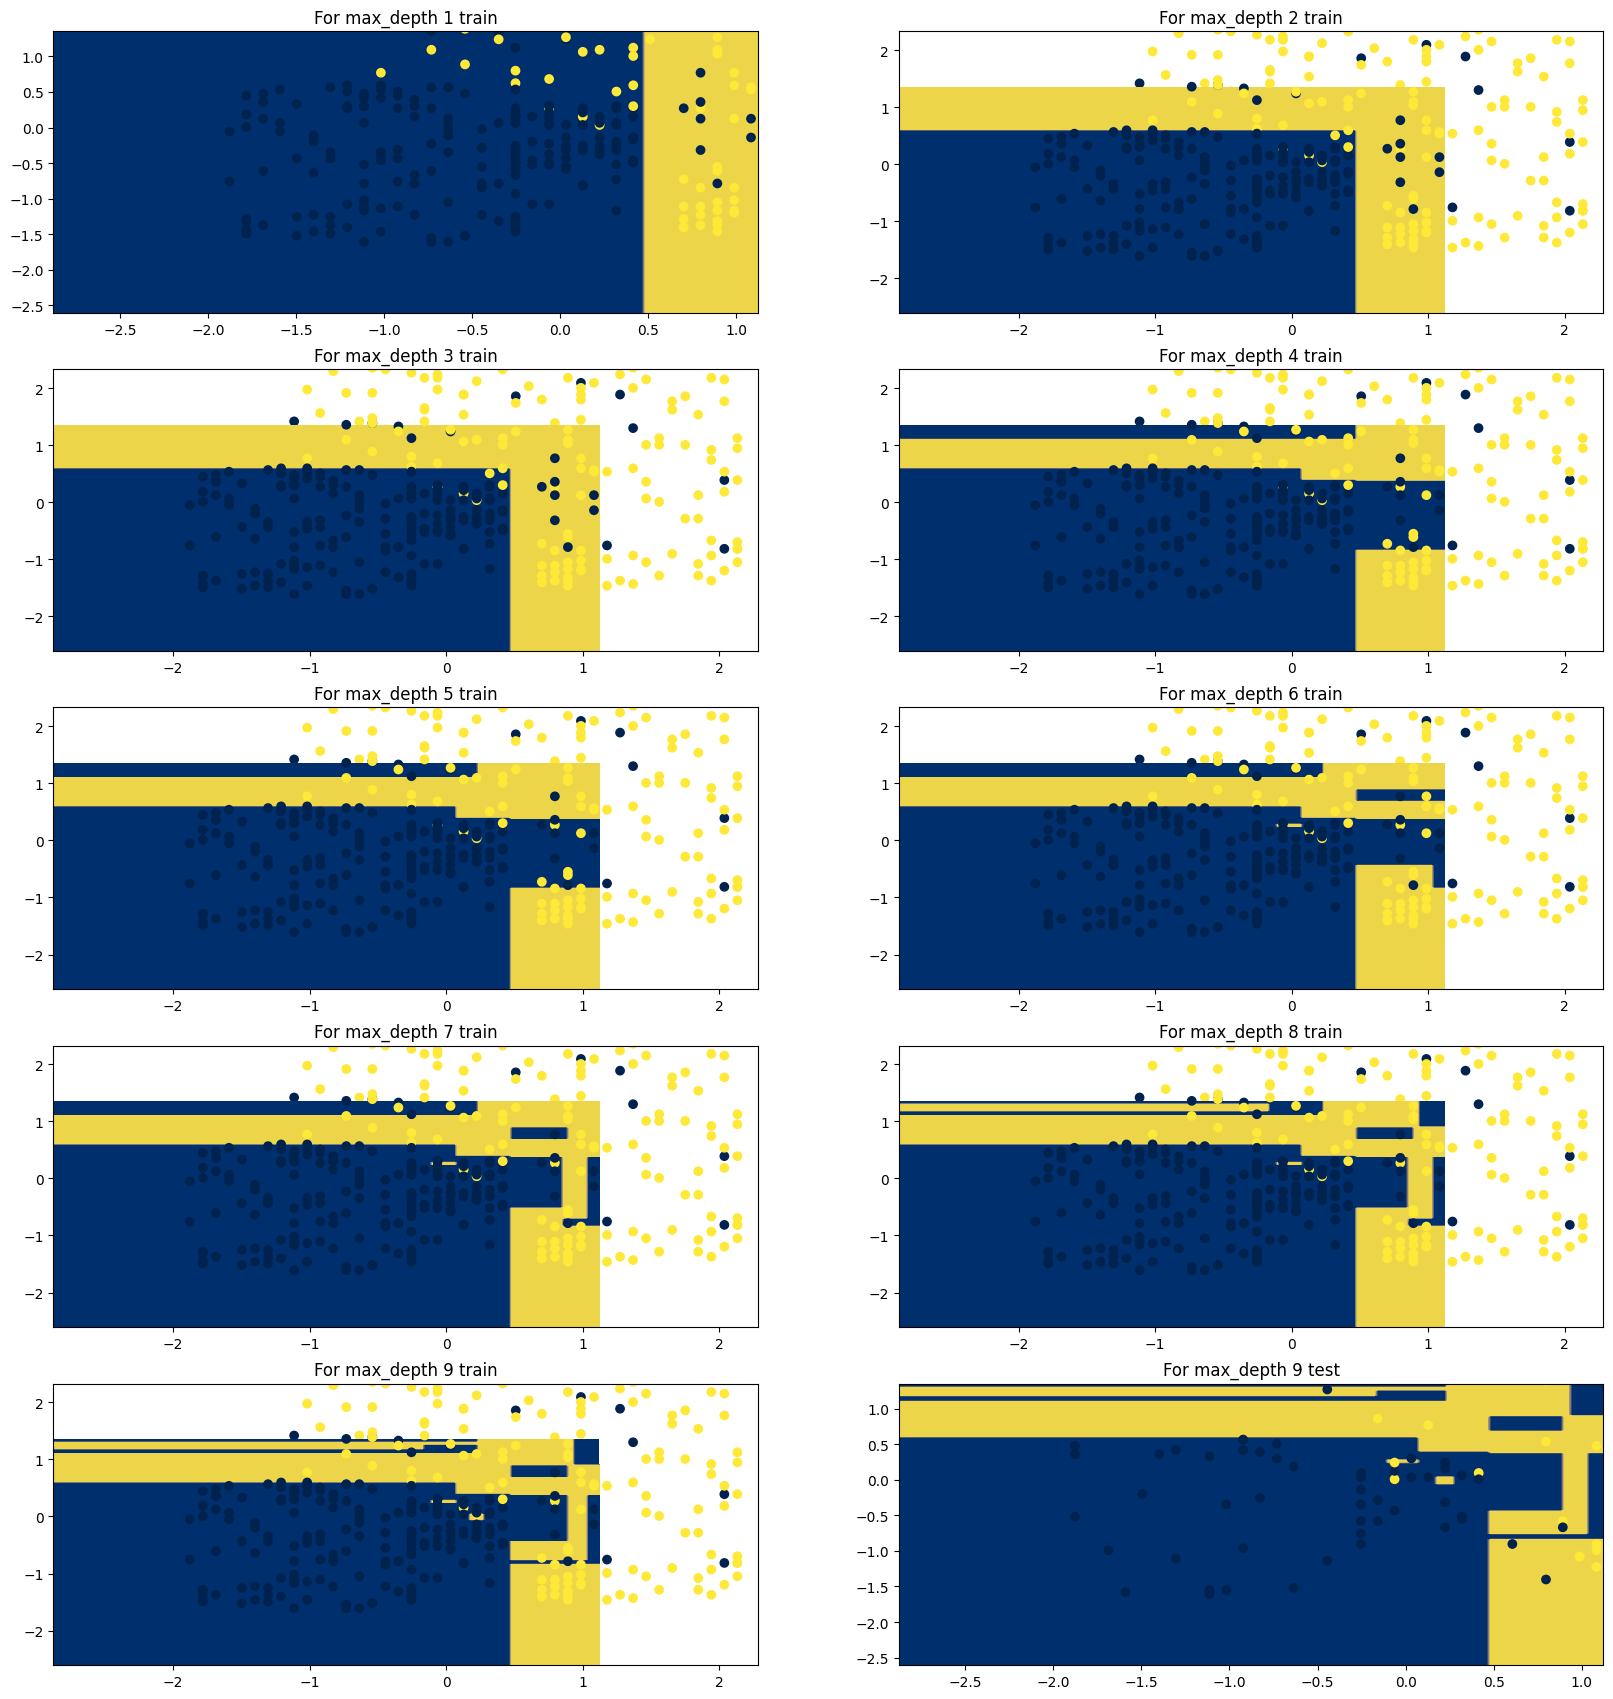

In [60]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for md in range(1,10):
    lr= DecisionTreeClassifier(max_depth=md).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"max_depth= {md}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(9, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For max_depth {md} train")
    
    plot += 1

    pl.subplot(9, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For max_depth {md} test")
    
    plot +=1

pl.show()

+ max_depth= 4 make `goodfitting`
   - Train acc= 0.946875
   - Test acc= 0.875


- max_depth= 9 make `overfitting`
   - Train acc= 0.984375
   - Test acc= 0.8625

22- Ensemble models

!["Ensemble models"](22-Ensemble_models.png)

- majority for classification
- mean or median for regression

23- Random forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- n_estimatorsint, default=100
    - The number of trees in the forest.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [71]:
clf= RandomForestClassifier().fit(x_train, y_train)
train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)
print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.996875
Test acc= 0.8625


In [74]:
for ne in [1, 2, 5, 10, 20, 50, 100, 200]:
    clf= RandomForestClassifier(n_estimators=ne).fit(x_train, y_train)
    train_preds= clf.predict(x_train)
    test_preds= clf.predict(x_test)
    print(f"Number of Estimators= {ne}")
    print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
    print(f"Test acc= {accuracy_score(y_test, test_preds)}")
    print("-"*40)

Number of Estimators= 1
Train acc= 0.953125
Test acc= 0.825
----------------------------------------
Number of Estimators= 2
Train acc= 0.95625
Test acc= 0.8375
----------------------------------------
Number of Estimators= 5
Train acc= 0.96875
Test acc= 0.85
----------------------------------------
Number of Estimators= 10
Train acc= 0.9875
Test acc= 0.875
----------------------------------------
Number of Estimators= 20
Train acc= 0.9875
Test acc= 0.8625
----------------------------------------


Number of Estimators= 50
Train acc= 0.99375
Test acc= 0.8625
----------------------------------------
Number of Estimators= 100
Train acc= 0.996875
Test acc= 0.875
----------------------------------------
Number of Estimators= 200
Train acc= 0.996875
Test acc= 0.875
----------------------------------------


control on `Number of Estimators`

Number of Estimators= 1
Train acc= 0.953125
Test acc= 0.8375
Number of Estimators= 2
Train acc= 0.953125
Test acc= 0.8375
Number of Estimators= 5
Train acc= 0.98125
Test acc= 0.8375
Number of Estimators= 10
Train acc= 0.984375
Test acc= 0.8375
Number of Estimators= 20
Train acc= 0.99375
Test acc= 0.8375
Number of Estimators= 50
Train acc= 0.99375
Test acc= 0.8375
Number of Estimators= 100
Train acc= 0.99375
Test acc= 0.8375
Number of Estimators= 200
Train acc= 0.99375
Test acc= 0.8375


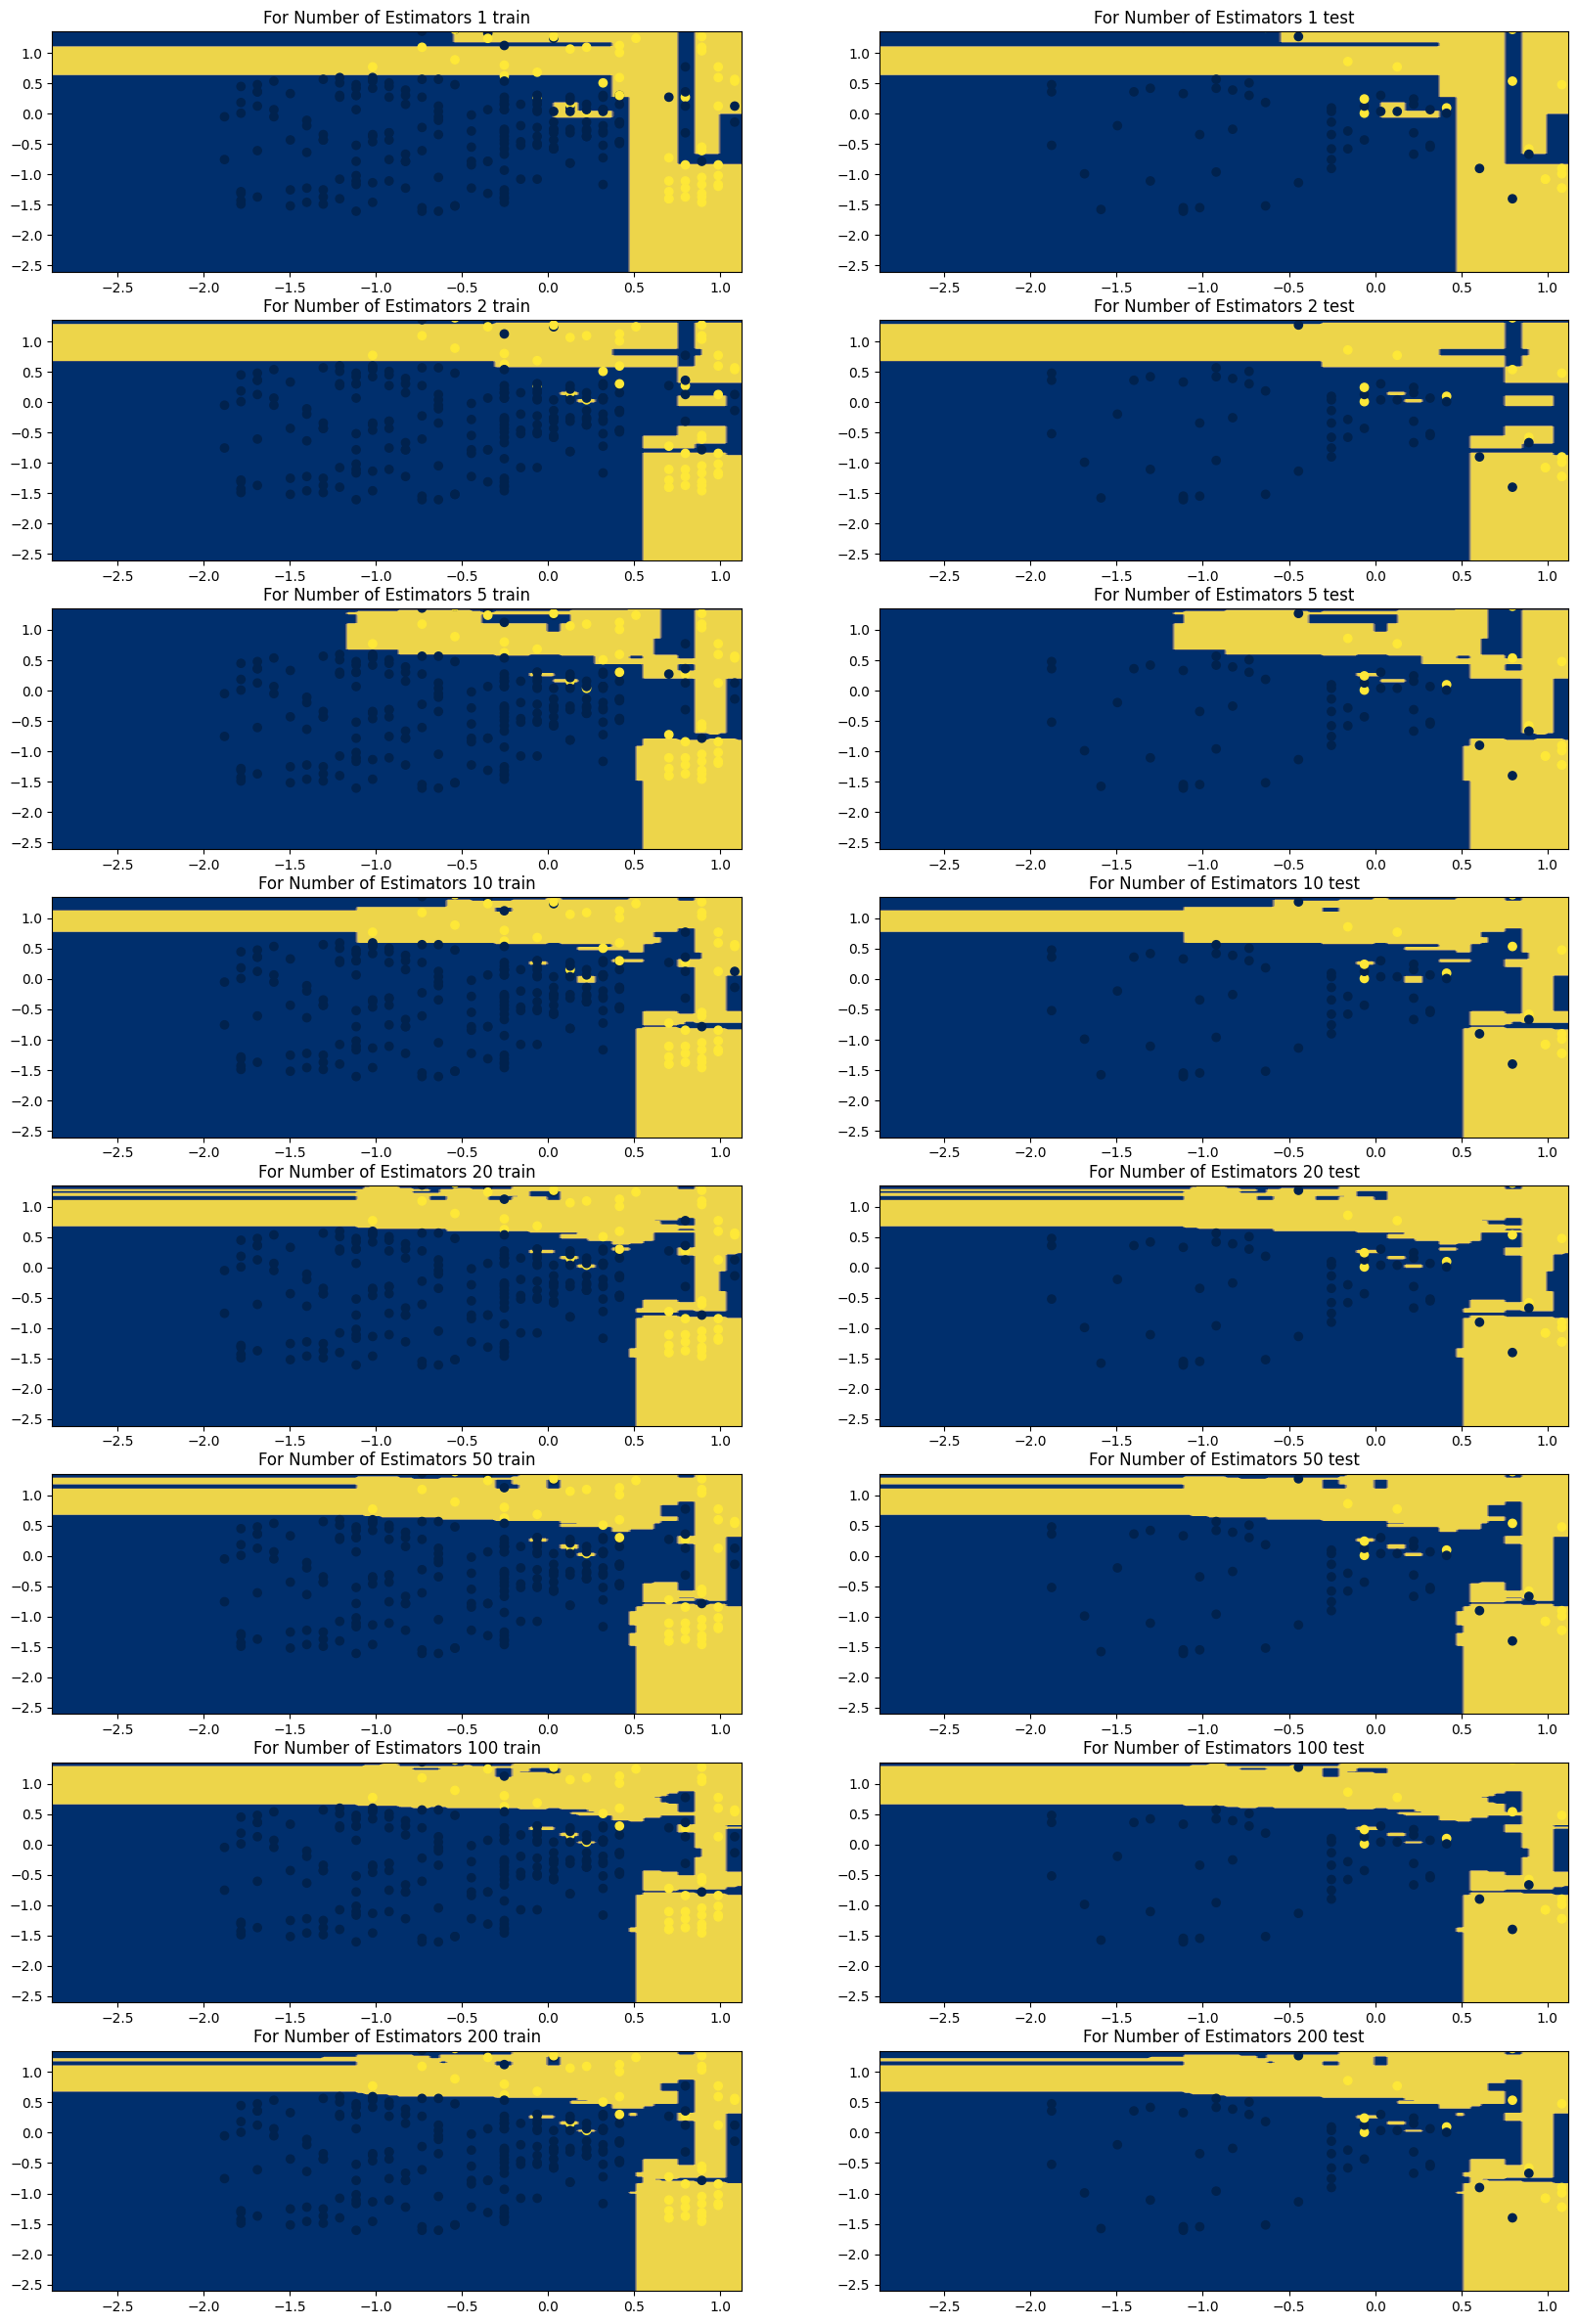

In [81]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for ne in [1, 2, 5, 10, 20, 50, 100, 200]:
    lr= RandomForestClassifier(n_estimators=ne).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"Number of Estimators= {ne}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(8, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For Number of Estimators {ne} train")
    
    plot += 1

    pl.subplot(8, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For Number of Estimators {ne} test")
    
    plot +=1

pl.show()

control on `Max Depth`

max_depth= 1
Train acc= 0.925
Test acc= 0.8625
max_depth= 2
Train acc= 0.928125
Test acc= 0.8625
max_depth= 3
Train acc= 0.93125
Test acc= 0.8625
max_depth= 4
Train acc= 0.94375
Test acc= 0.8625
max_depth= 5
Train acc= 0.95625
Test acc= 0.8625
max_depth= 6
Train acc= 0.96875
Test acc= 0.8625
max_depth= 7
Train acc= 0.98125
Test acc= 0.85
max_depth= 8
Train acc= 0.984375
Test acc= 0.8375
max_depth= 9
Train acc= 0.990625
Test acc= 0.8375


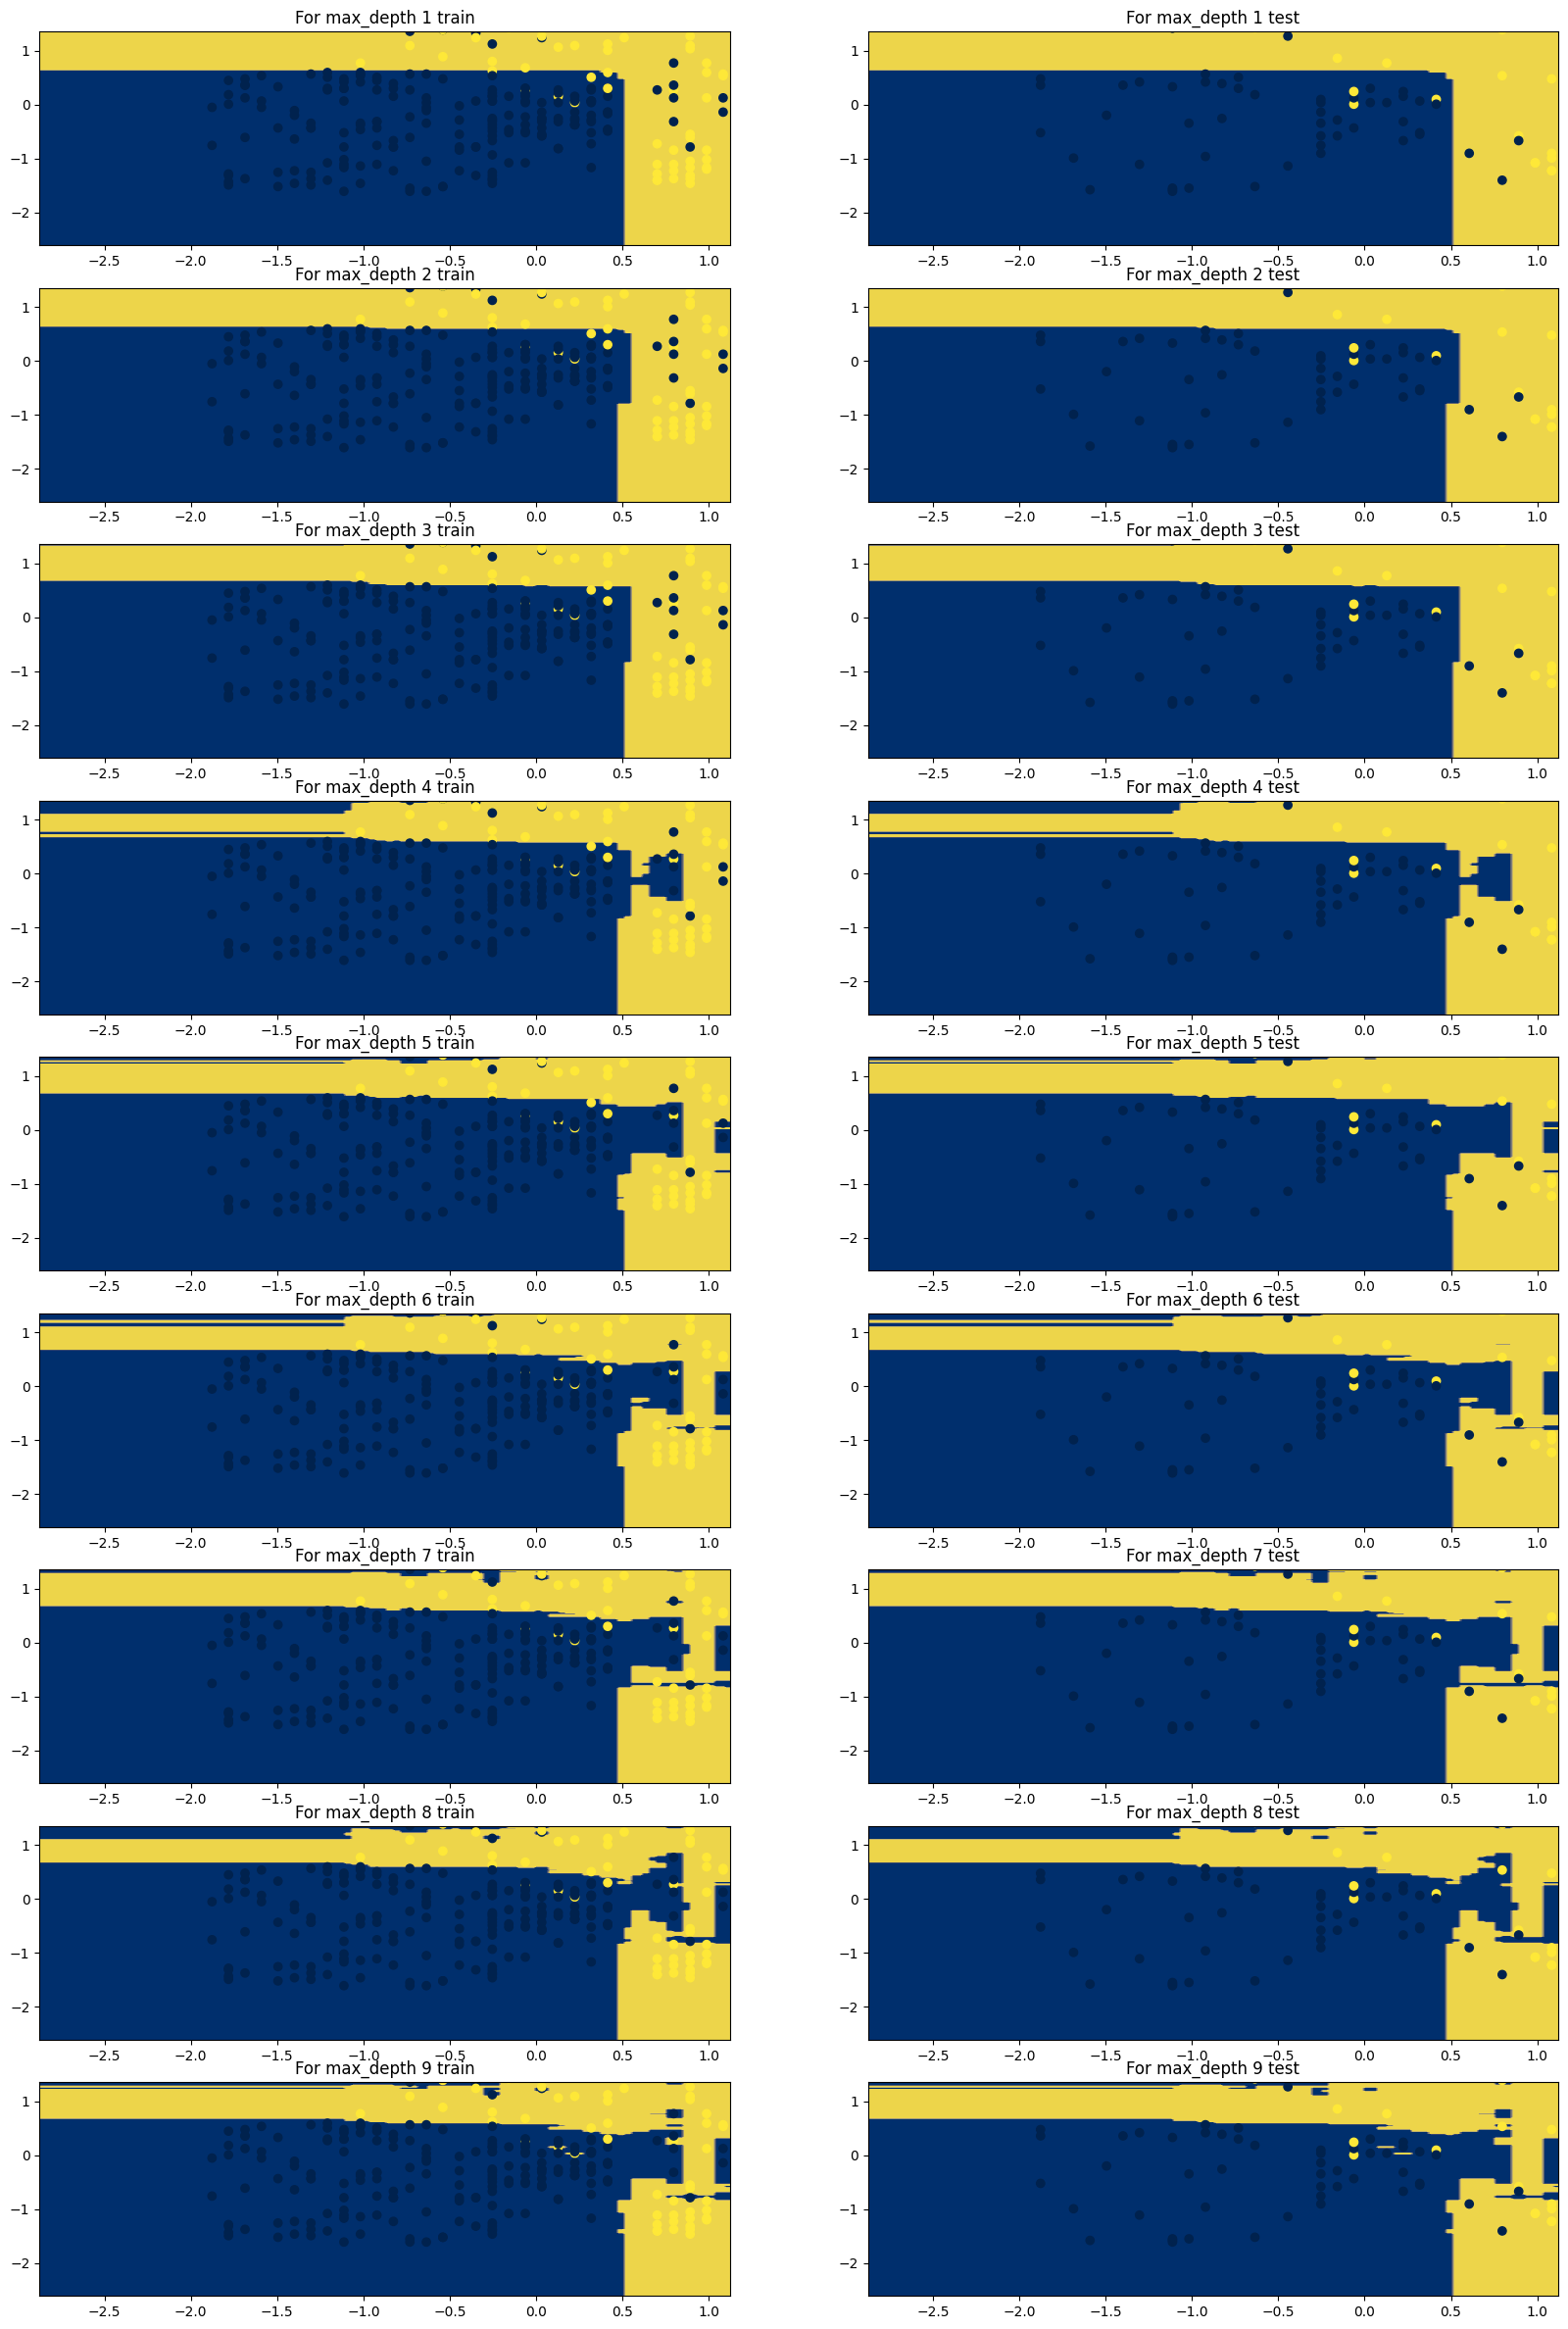

In [79]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for md in range(1,10):
    lr= RandomForestClassifier(max_depth=md).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"max_depth= {md}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(9, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For max_depth {md} train")
    
    plot += 1

    pl.subplot(9, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For max_depth {md} test")
    
    plot +=1

pl.show()

24 - Boosting and XGboost
- make `learning on errors` belongs last model in ensembles.

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [83]:
clf= XGBClassifier().fit(x_train, y_train)
train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)
print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.9875
Test acc= 0.8375


decrease learning rate , default= 0.3

In [84]:
clf= XGBClassifier(eta=0.1).fit(x_train, y_train)
train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)
print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.971875
Test acc= 0.85


increase levels trees , default= 0

In [89]:
clf= XGBClassifier(gamma=5).fit(x_train, y_train)
train_preds= clf.predict(x_train)
test_preds= clf.predict(x_test)
print(f"Train acc= {accuracy_score(y_train, train_preds)}") 
print(f"Test acc= {accuracy_score(y_test, test_preds)}")

Train acc= 0.93125
Test acc= 0.8625


gamma with plots

Number of gamma= 0
Train acc= 0.978125
Test acc= 0.85
Number of gamma= 1
Train acc= 0.959375
Test acc= 0.875
Number of gamma= 2
Train acc= 0.953125
Test acc= 0.875
Number of gamma= 5
Train acc= 0.93125
Test acc= 0.8625
Number of gamma= 10
Train acc= 0.93125
Test acc= 0.8625
Number of gamma= 20
Train acc= 0.928125
Test acc= 0.8625
Number of gamma= 50
Train acc= 0.928125
Test acc= 0.8625
Number of gamma= 100
Train acc= 0.84375
Test acc= 0.825
Number of gamma= 200
Train acc= 0.63125
Test acc= 0.6875


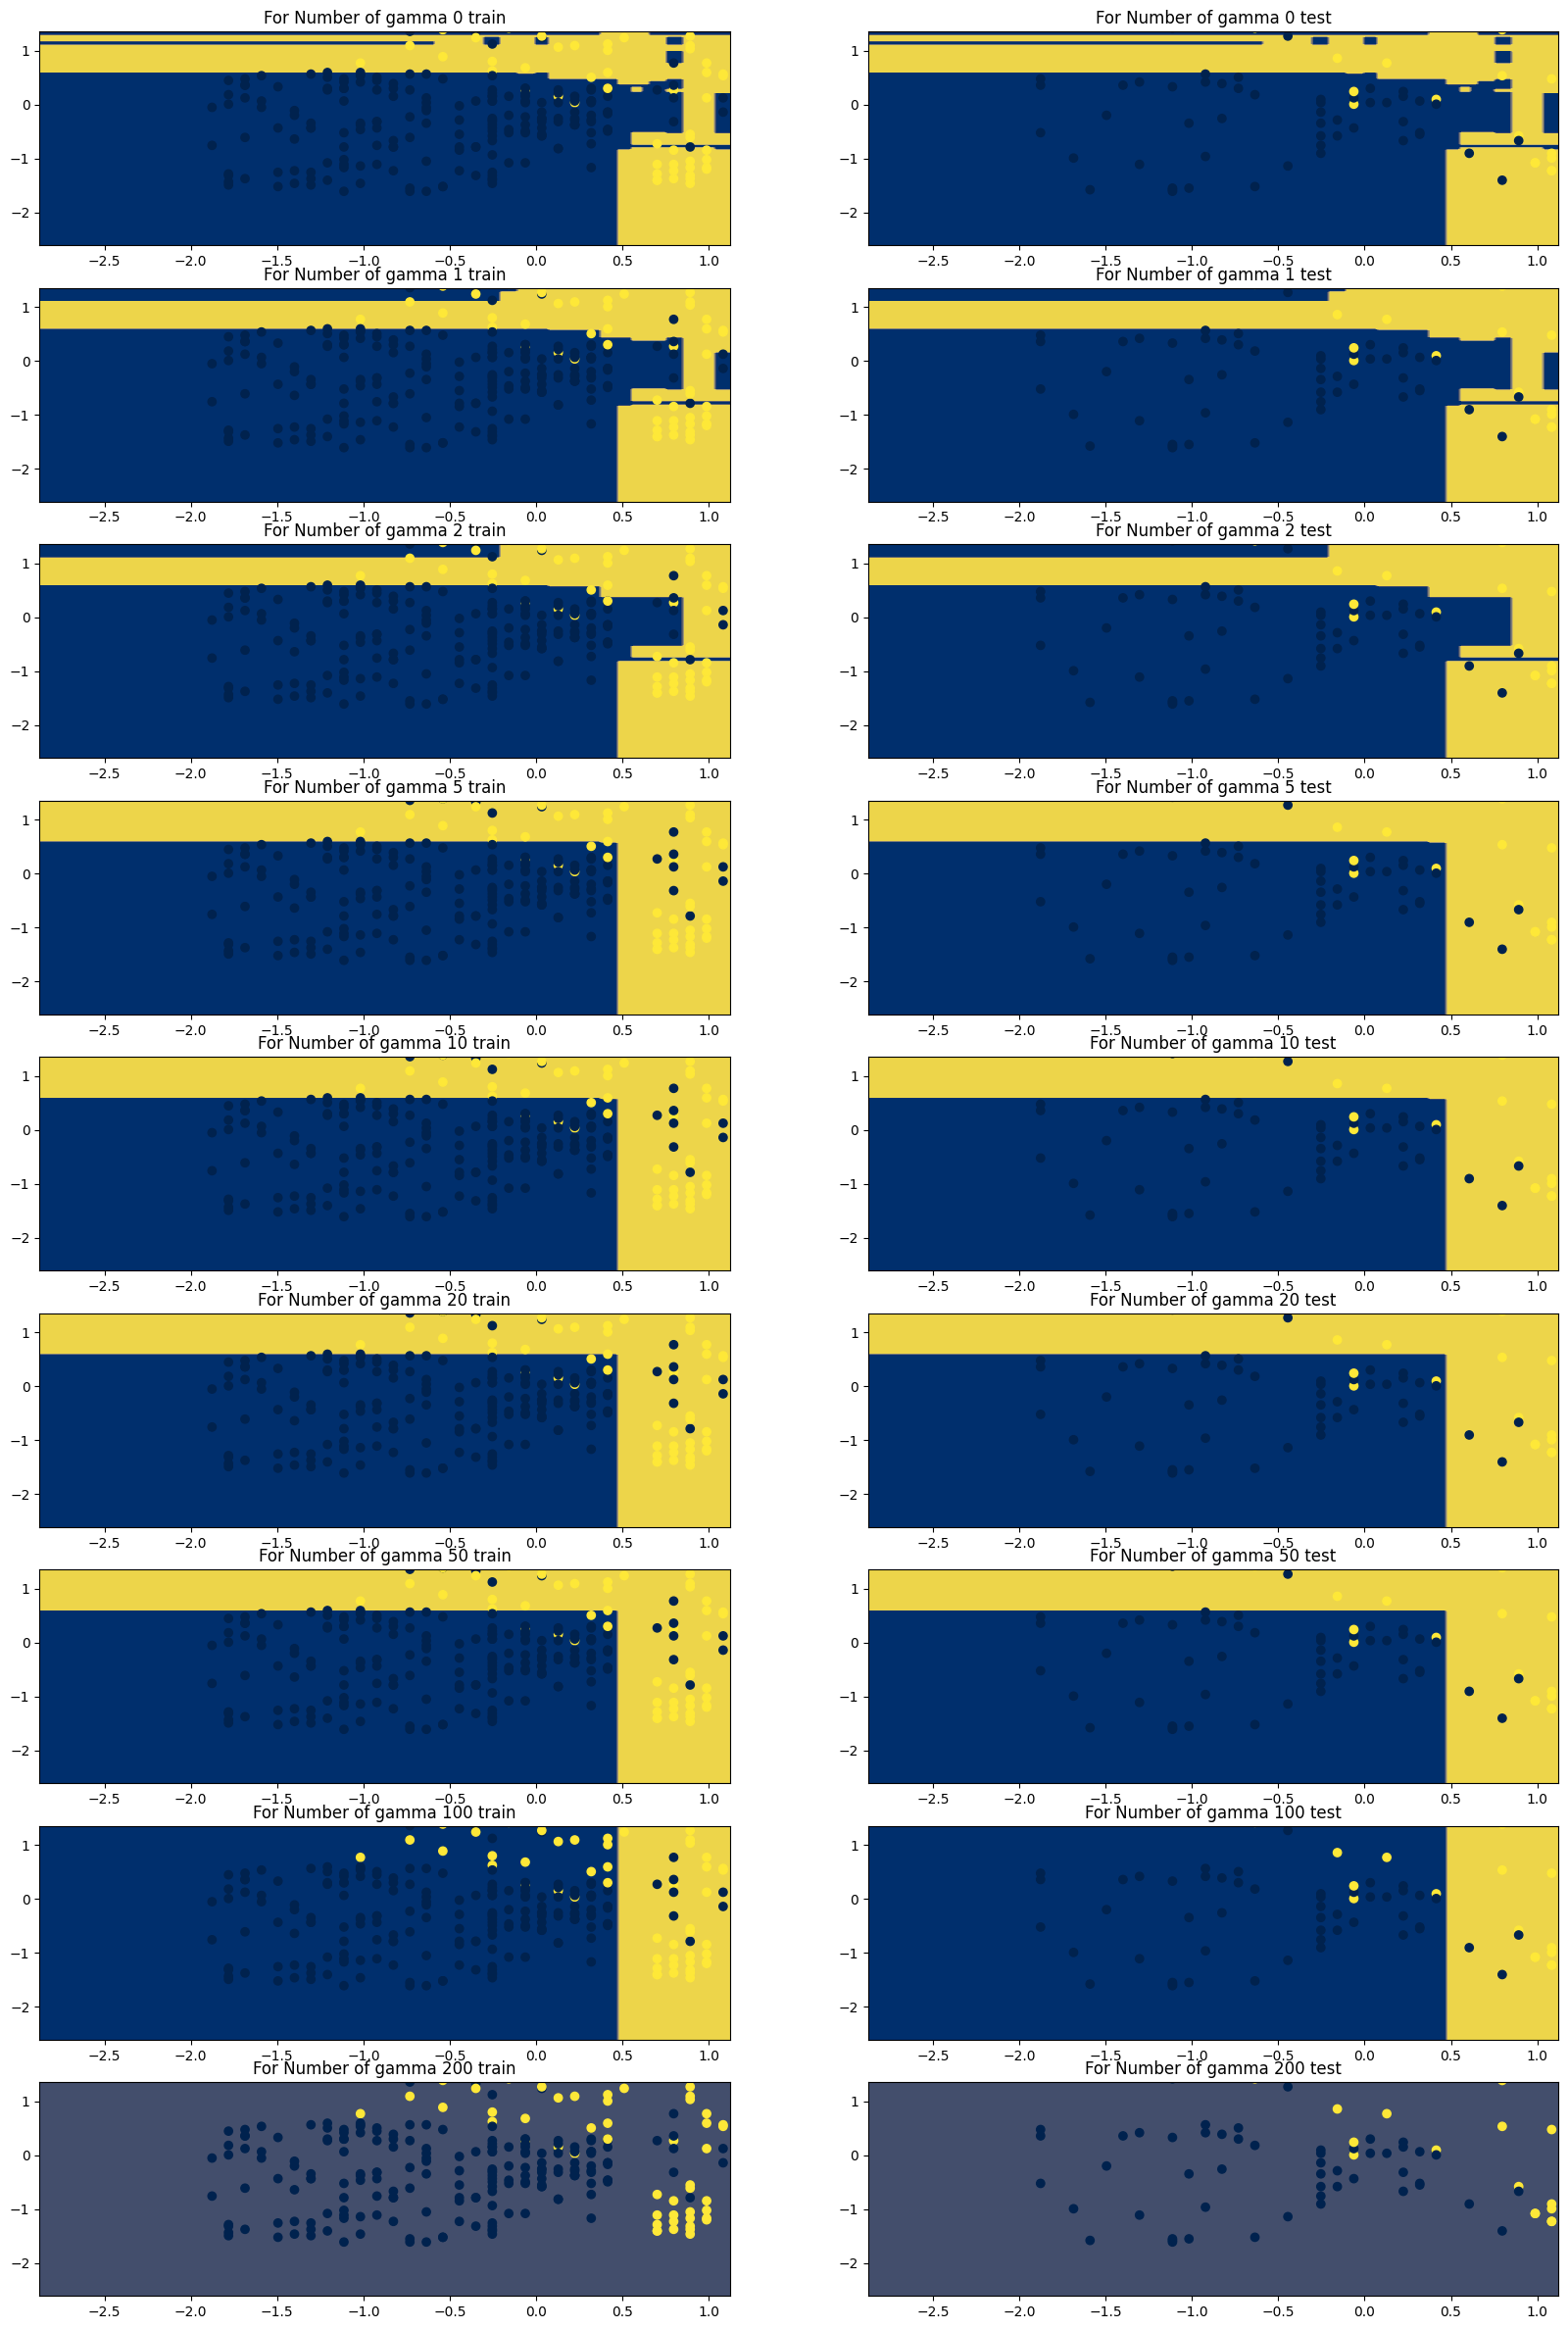

In [90]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for ne in [0, 1, 2, 5, 10, 20, 50, 100, 200]:
    lr= XGBClassifier(gamma=ne).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"Number of gamma= {ne}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(9, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For Number of gamma {ne} train")
    
    plot += 1

    pl.subplot(9, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For Number of gamma {ne} test")
    
    plot +=1

pl.show()

`increase` levels trees make `less in questions` then `sharpe linear` with one question

eta with plots

eta= 0
Train acc= 0.978125
Test acc= 0.85


eta= 0.1
Train acc= 0.975
Test acc= 0.85
eta= 0.2
Train acc= 0.965625
Test acc= 0.8625
eta= 0.5
Train acc= 0.9625
Test acc= 0.875
eta= 0.7
Train acc= 0.9625
Test acc= 0.875
eta= 0.9
Train acc= 0.959375
Test acc= 0.875


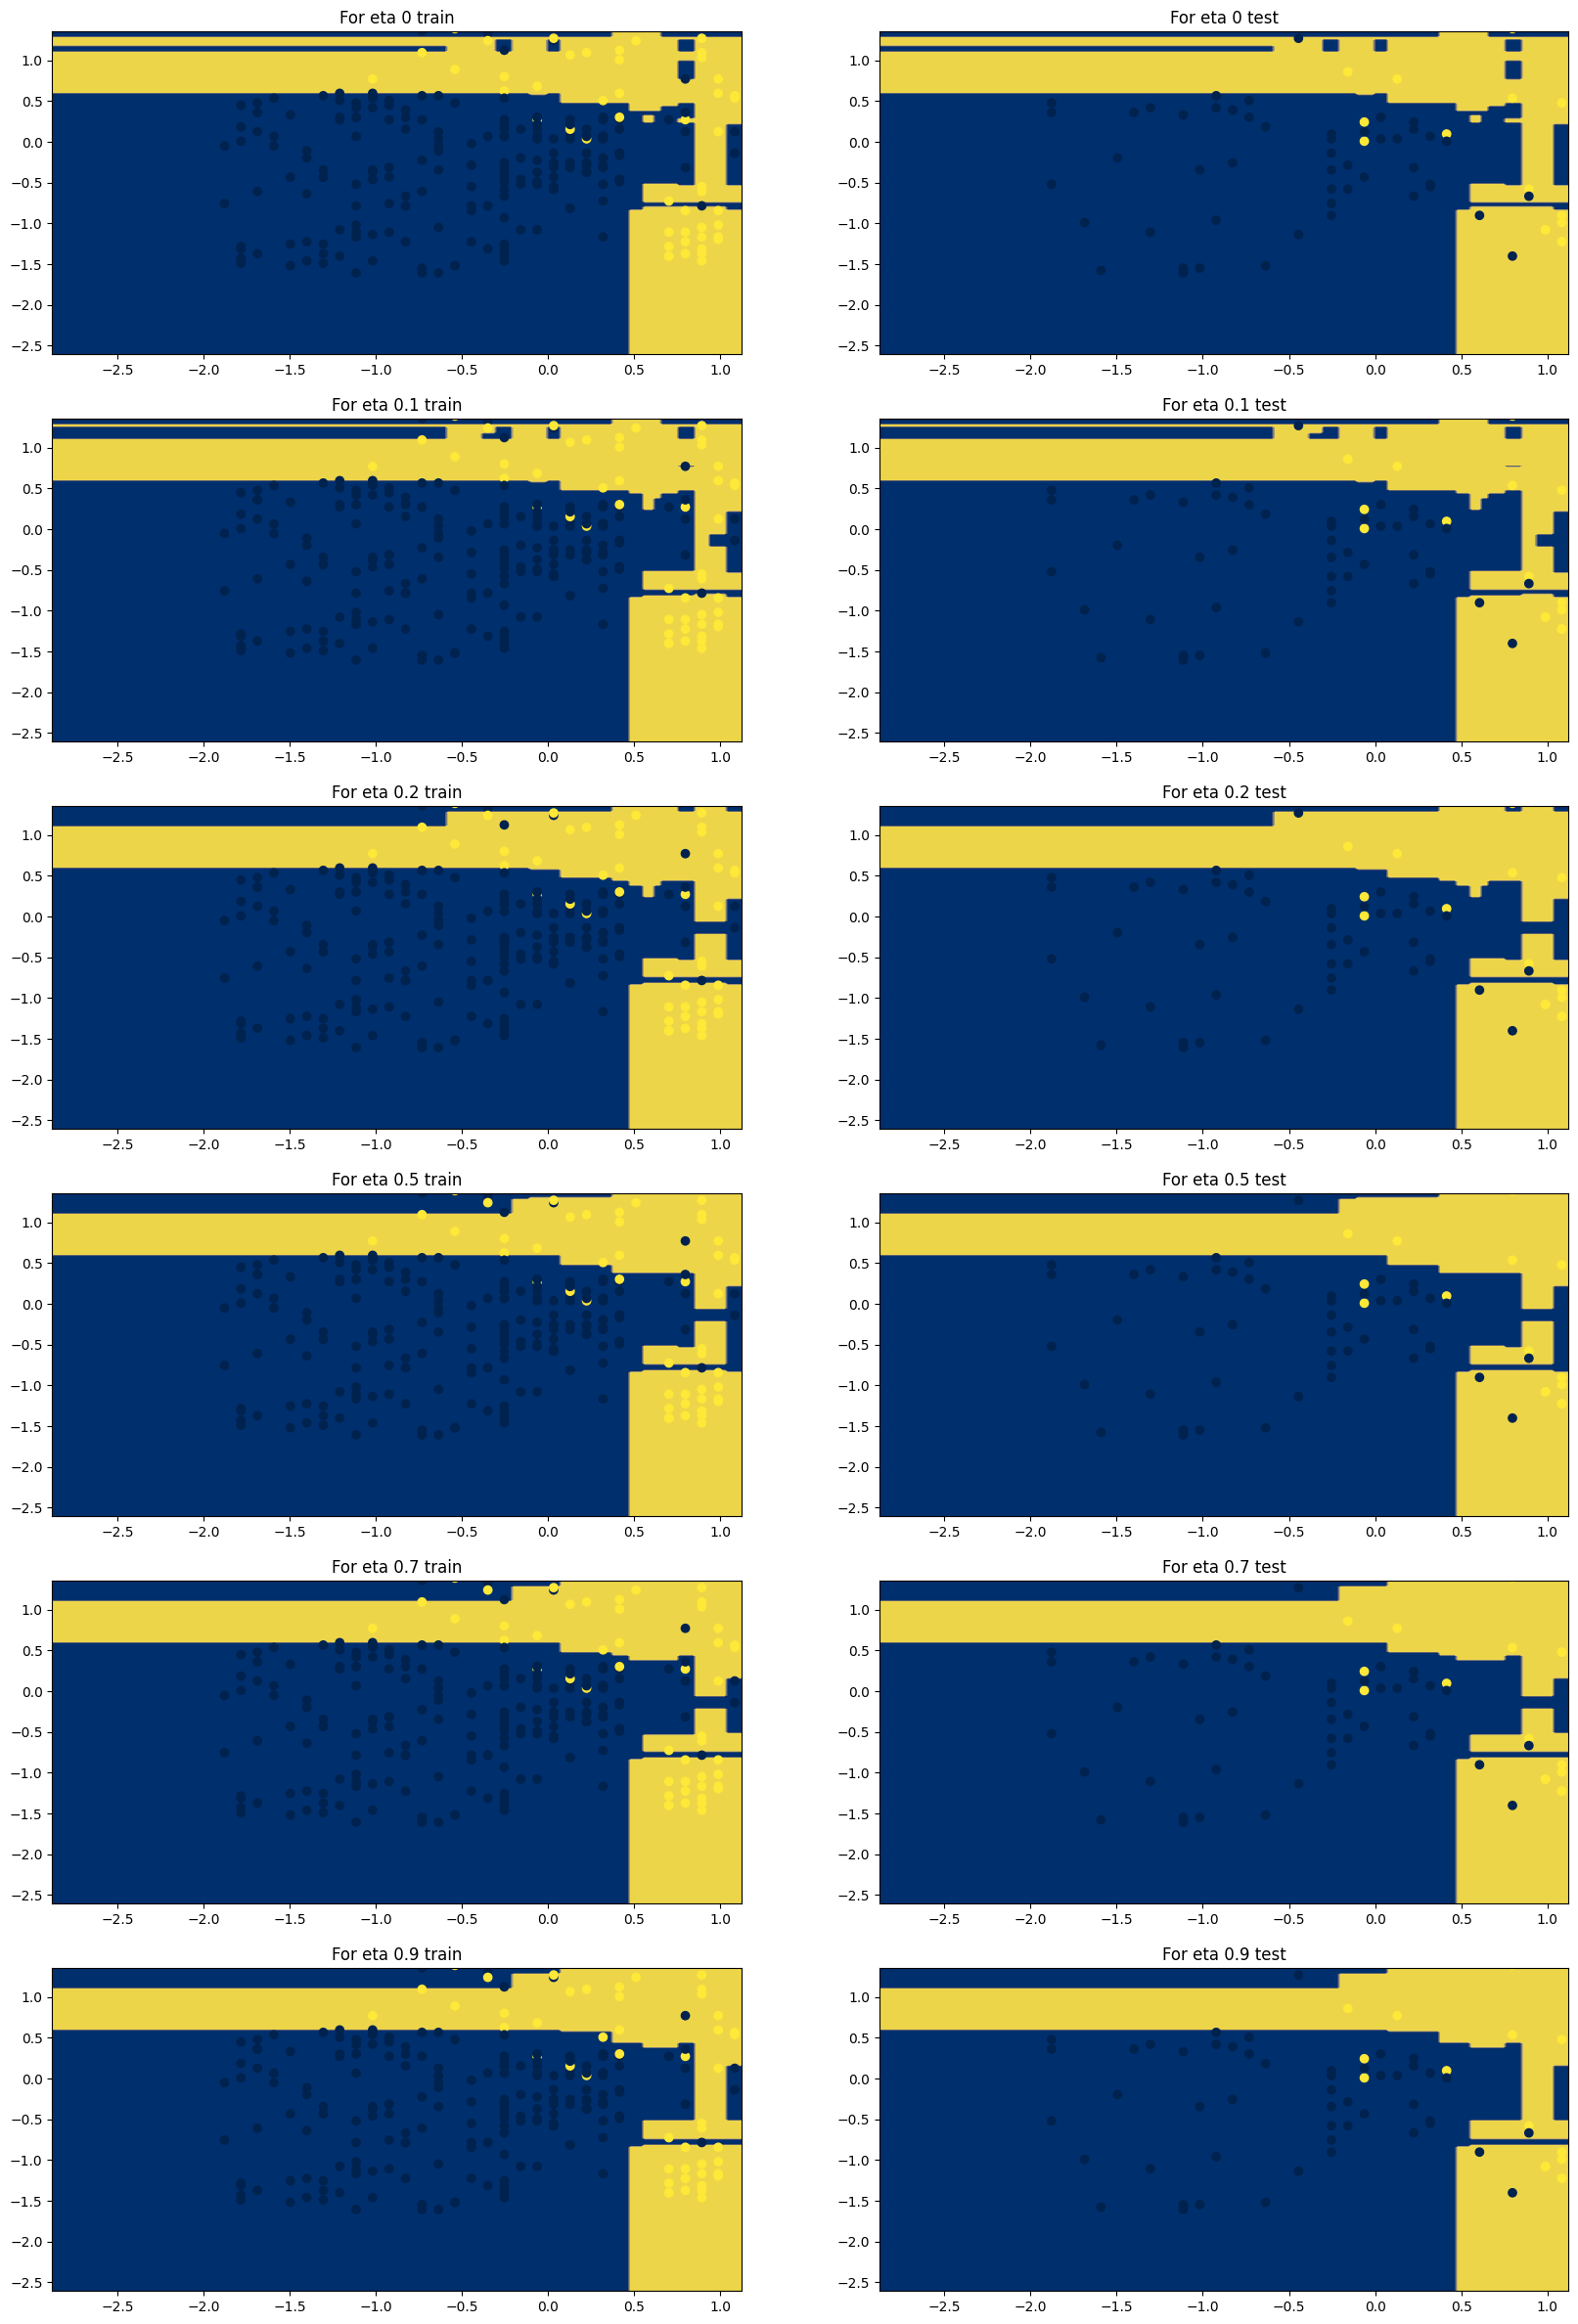

In [93]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for ne in [0, 0.1, 0.2, 0.5, 0.7, 0.9]:
    lr= XGBClassifier(eta=ne).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"eta= {ne}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(6, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For eta {ne} train")
    
    plot += 1

    pl.subplot(6, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For eta {ne} test")
    
    plot +=1
pl.show()

when `increase` learning rate model arrives to target `faster` but make `overfitting`

max_depth with plots

max depth= 1
Train acc= 0.9375
Test acc= 0.875
max depth= 2
Train acc= 0.9625
Test acc= 0.85
max depth= 5
Train acc= 0.975
Test acc= 0.85
max depth= 10
Train acc= 0.978125
Test acc= 0.85
max depth= 20
Train acc= 0.978125
Test acc= 0.85
max depth= 30
Train acc= 0.978125
Test acc= 0.85


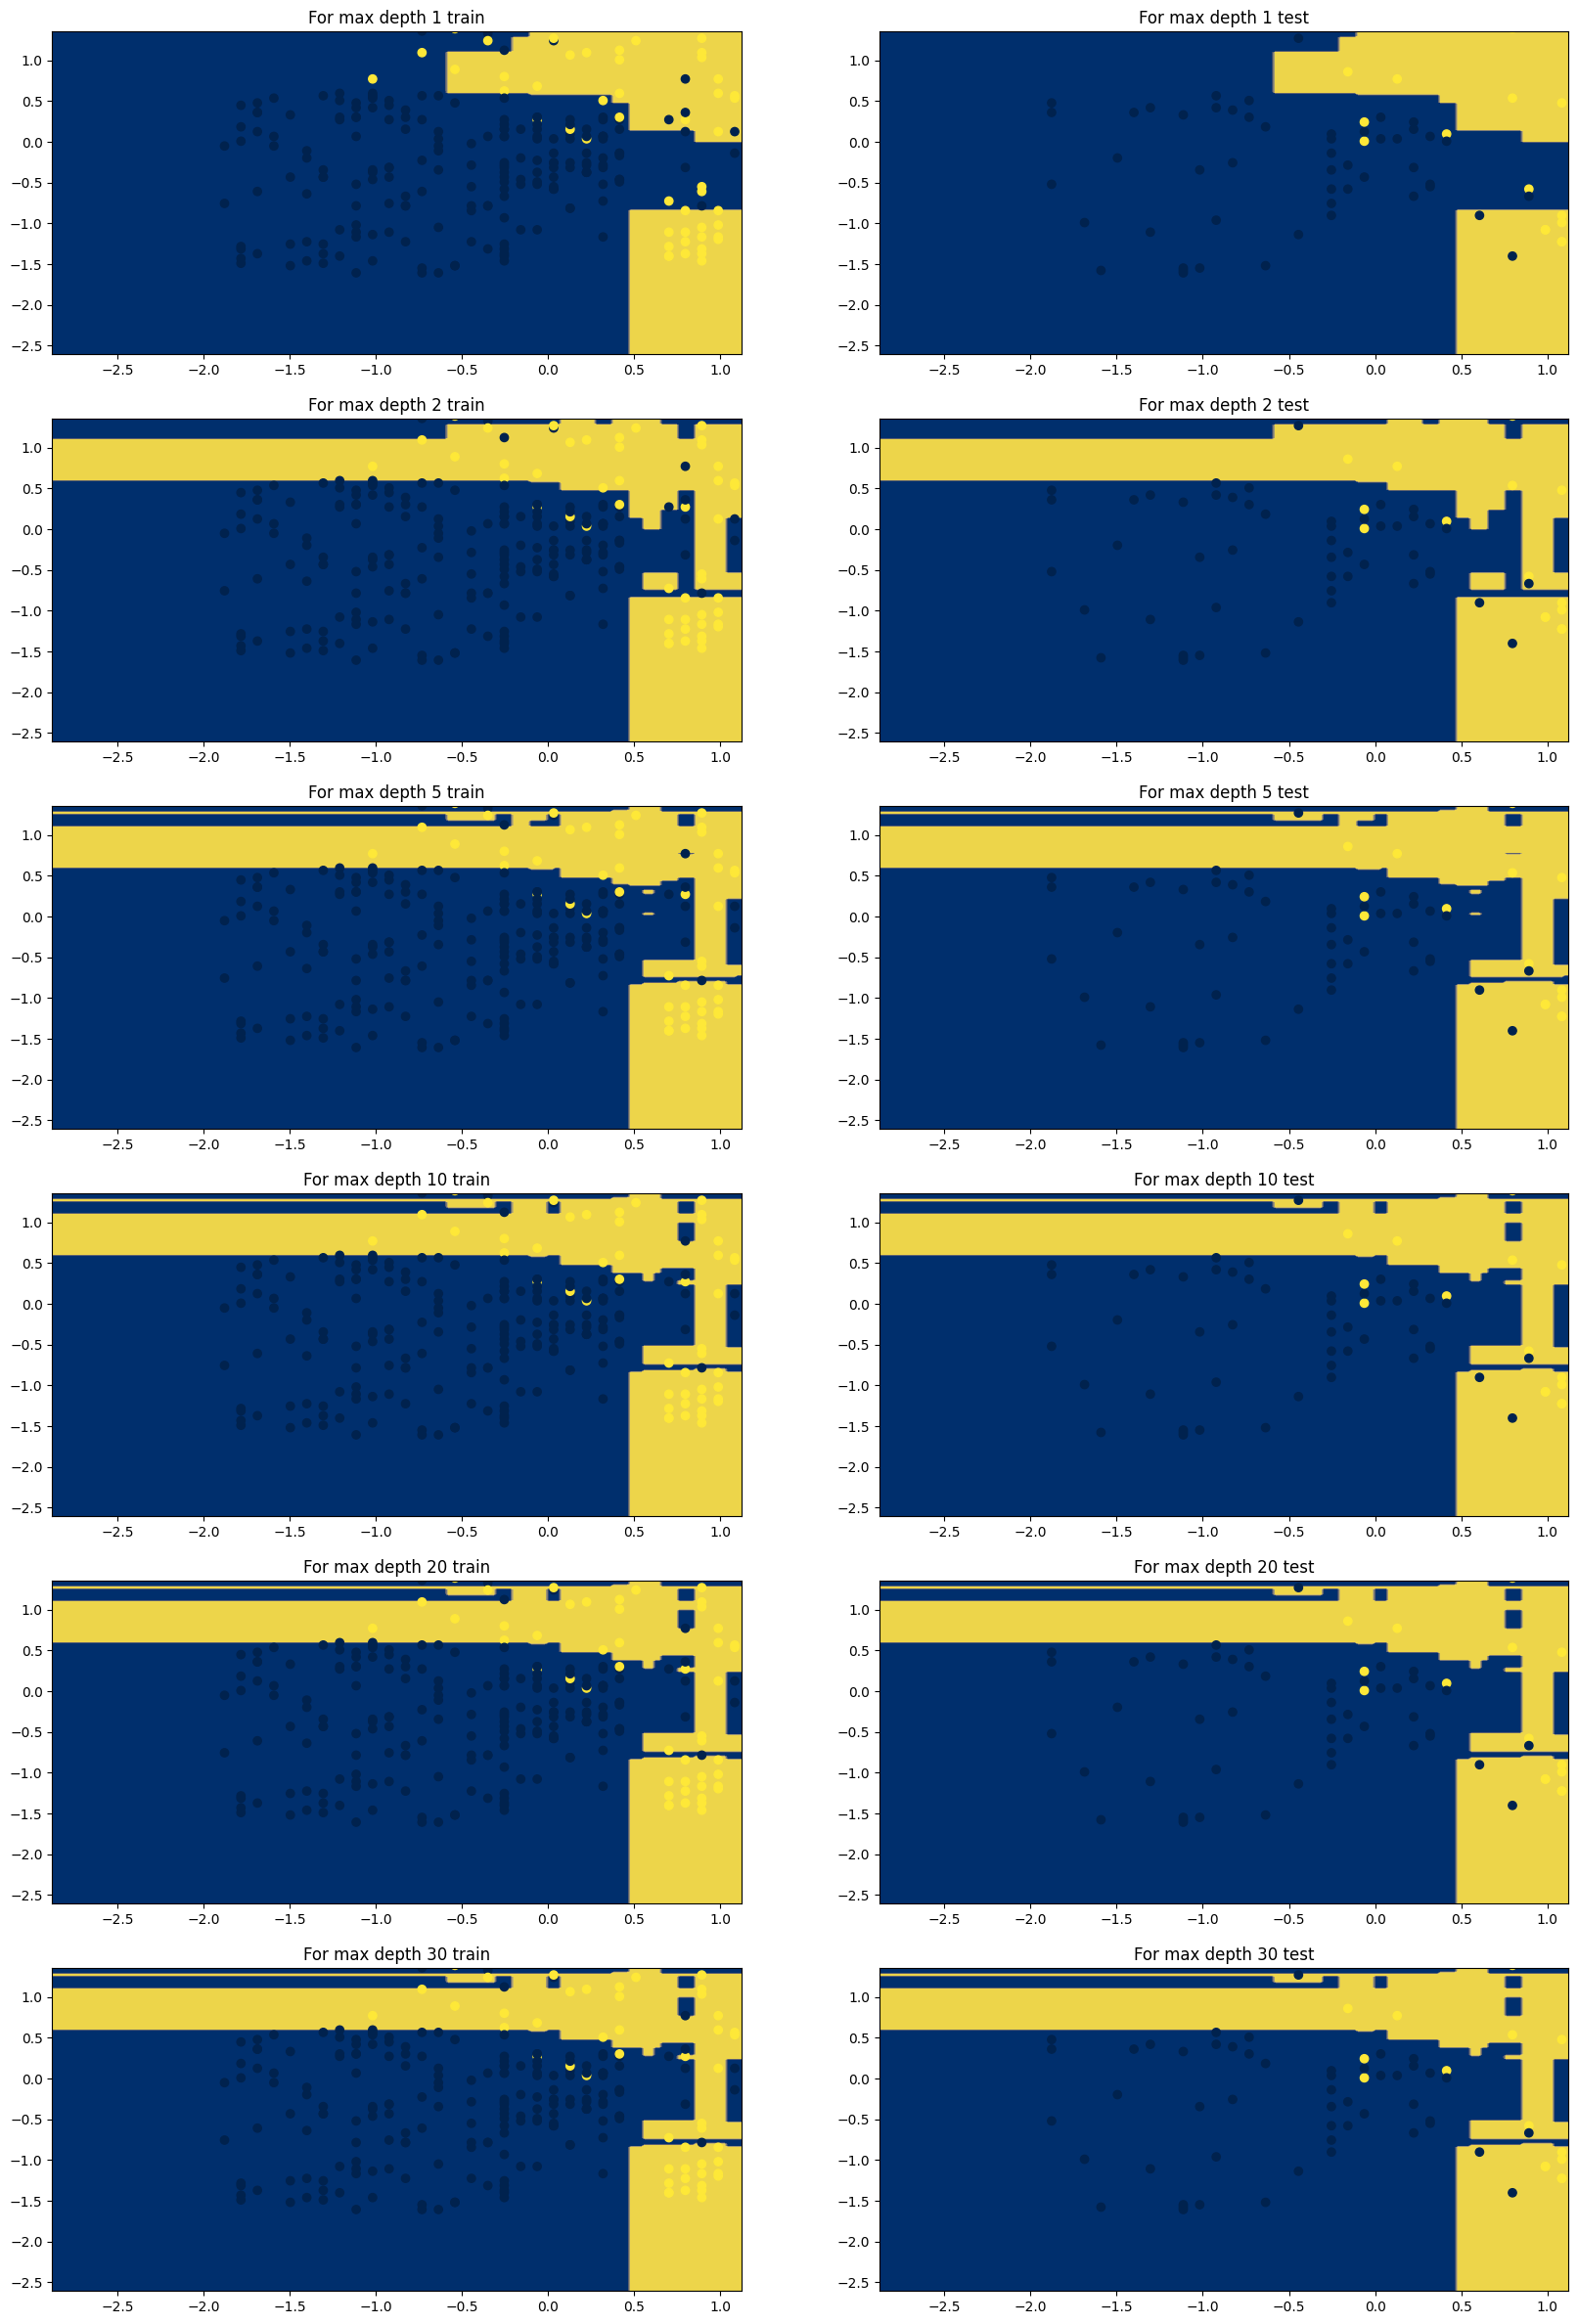

In [94]:
pl.figure(figsize=(20,30))
pl.set_cmap(pl.cm.cividis)

plot = 1 # for move from plot to plot
for ne in [1, 2, 5, 10, 20, 30]:
    lr= XGBClassifier(max_depth=ne).fit(x_train[:, 1:], y_train)
    train_preds3 = lr.predict(x_train[:, 1:])
    test_preds3 = lr.predict(x_test[:, 1:])
    print(f"max depth= {ne}")
    print(f"Train acc= {accuracy_score(y_train, train_preds3)}")
    print(f"Test acc= {accuracy_score(y_test, test_preds3)}")
    
    pl.subplot(6, 2, plot)
    z= lr.predict(np.c_[age_grid.ravel(), es_grid.ravel()])
    
    z= z.reshape(age_grid.shape) # es_grid.shape = age_grid.shape 
    pl.contourf(age_grid, es_grid, z) # contour lines to visualize the decision boundaries 
    pl.axis("tight")
    pl.scatter(x_train[:, 1], x_train[:, 2], c=y_train)
    pl.title(f"For max depth {ne} train")
    
    plot += 1

    pl.subplot(6, 2, plot)
    pl.contourf(age_grid, es_grid, z)
    pl.axis("tight")
    pl.scatter(x_test[:, 1], x_test[:, 2], c=y_test)
    pl.title(f"For max depth {ne} test")
    
    plot +=1
pl.show()

26 - Cross validation

!["26-cross_validation"](26-cross_validation.png)

In [63]:
from sklearn.model_selection import StratifiedGroupKFold
# i can pass data without make train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [66]:
# clf = RandomForestClassifier()
# kf = StratifiedGroupKFold(n_splits=5)
# list_of_acc = [] 

# for train_idx, test_idx in kf.split(x_scl, y):
#     train_data = x_scl[train_idx]
#     test_data = x_scl[test_idx]
    
#     train_y = y.iloc[train_idx]
#     test_y = y.iloc[test_idx]
    
#     clf.fit(train_data, train_y)
#     preds = clf.predict(test_data)
    
#     acc = accuracy_score(test_y, preds)
#     list_of_acc.append(acc)


In [125]:
np.mean(list_of_acc)

1.0

In [124]:
np.std(list_of_acc)

0.0

27 - Hyper parameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [135]:
params= {
    'n_estimators': [10,20,50,70,100],
    'max_depth': [1,2,3,4,5]
}

clf= RandomForestClassifier()
gsclf= GridSearchCV(clf, params).fit(x_train, y_train)
gsclf

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 70, 100]})

GridSearchCV use each value in `n_estimators` with each value in `max_depth`

In [136]:
pd.DataFrame(gsclf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.023819      0.003827         0.003565        0.001187   
1        0.050182      0.006049         0.005697        0.001221   
2        0.216944      0.049781         0.020296        0.004141   
3        0.323347      0.085556         0.023119        0.012223   
4        0.364578      0.108001         0.024471        0.008005   
5        0.023149      0.001047         0.003638        0.000825   
6        0.048631      0.003489         0.005011        0.001038   
7        0.138301      0.012565         0.015503        0.006747   
8        0.182696      0.026731         0.013444        0.002250   
9        0.273780      0.020415         0.022834        0.005228   
10       0.030882      0.005915         0.003495        0.000444   
11       0.045134      0.003290         0.004583        0.001244   
12       0.135649      0.014692         0.011839        0.003042   
13       0.183142      0.023223         0.014966        0.004095   
14       0.281046      0.051608         0.022556        0.007769   
15       0.029210      0.005648         0.004677        0.001293   
16       0.064031      0.006994         0.006155        0.001009   
17       0.176497      0.025819         0.014430        0.002268   
18       0.237626      0.029787         0.018166        0.004432   
19       0.269761      0.039248         0.023910        0.003675   
20       0.037252      0.005244         0.004023        0.000267   
21       0.049303      0.006790         0.005540        0.000309   
22       0.150517      0.026047         0.012932        0.001504   
23       0.188337      0.024200         0.016538        0.003568   
24       0.356071      0.098664         0.023504        0.004512   

   param_max_depth param_n_estimators                                 params  \
0                1                 10   {'max_depth': 1, 'n_estimators': 10}   
1                1                 20   {'max_depth': 1, 'n_estimators': 20}   
2                1                 50   {'max_depth': 1, 'n_estimators': 50}   
3                1                 70   {'max_depth': 1, 'n_estimators': 70}   
4                1                100  {'max_depth': 1, 'n_estimators': 100}   
5                2                 10   {'max_depth': 2, 'n_estimators': 10}   
6                2                 20   {'max_depth': 2, 'n_estimators': 20}   
7                2                 50   {'max_depth': 2, 'n_estimators': 50}   
8                2                 70   {'max_depth': 2, 'n_estimators': 70}   
9                2                100  {'max_depth': 2, 'n_estimators': 100}   
10               3                 10   {'max_depth': 3, 'n_estimators': 10}   
11               3                 20   {'max_depth': 3, 'n_estimators': 20}   
12               3                 50   {'max_depth': 3, 'n_estimators': 50}   
13               3                 70   {'max_depth': 3, 'n_estimators': 70}   
14               3                100  {'max_depth': 3, 'n_estimators': 100}   
15               4                 10   {'max_depth': 4, 'n_estimators': 10}   
16               4                 20   {'max_depth': 4, 'n_estimators': 20}   
17               4                 50   {'max_depth': 4, 'n_estimators': 50}   
18               4                 70   {'max_depth': 4, 'n_estimators': 70}   
19               4                100  {'max_depth': 4, 'n_estimators': 100}   
20               5                 10   {'max_depth': 5, 'n_estimators': 10}   
21               5                 20   {'max_depth': 5, 'n_estimators': 20}   
22               5                 50   {'max_depth': 5, 'n_estimators': 50}   
23               5                 70   {'max_depth': 5, 'n_estimators': 70}   
24               5                100  {'max_depth': 5, 'n_estimators': 100}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.796875           0.812500           0.843750   
1            0.781250       

- GridSearchCV split data for `default cross-validation = 5` 
- `rank` accuracy 
- `less standard deviation` value is `good accuracy`

In [137]:
model= gsclf.best_estimator_
model

RandomForestClassifier(max_depth=3, n_estimators=50)

In [138]:
model.fit(x_train, y_train)
preds= model.predict(x_test)
accuracy_score(y_test, preds)

0.8625